# &#x1F4D1; &nbsp; $\mathfrak {\color{#228B22} {P6: Capstone \ Project.\ Sberbank \ Russian \ Housing \ Market}}$

---
## $\mathfrak {\color{#228B22} {0. \ Links \ and \ Code \ Library }}$
- Sberbank Russian Housing Market https://www.kaggle.com/c/sberbank-russian-housing-market
- Model evaluation: quantifying the quality of predictions http://scikit-learn.org/stable/modules/model_evaluation.html

In [1]:
from IPython.core.display import HTML
hide_code = ''
HTML('''
<script> 
code_show = true;
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {if (id==0 || $(this).html().indexOf('hide_code')>-1) {$(this).hide();}});
        $('div.output_prompt').css('opacity', 0);
    } else { 
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
};
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: #228B22; background: ghostwhite; opacity: 0.9;"
type="submit" value="Click to display or hide code">
</form>
''')

In [2]:
hide_code
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy

import seaborn as sns
import matplotlib.pylab as plt

from random import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

import keras as ks
from keras.models import Sequential, load_model, Model
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [3]:
hide_code
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

def loss_plot(fit_history):
    plt.figure(figsize=(18, 6))

    plt.plot(fit_history.history['loss'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_loss'], color='#228B22', label = 'test')

    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(18, 6))

    plt.plot(fit_history.history['mean_absolute_error'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], color='#228B22', label = 'test')

    plt.legend()
    plt.title('Mean Absolute Error');   

def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
    
def scores2(regressor, target, target_predict):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score:", explained_variance_score(target, target_predict))
    print("---------")
    print("R2 score:", r2_score(target, target_predict))
    print("---------")
    print("MSE score:", mean_squared_error(target, target_predict))
    print("---------")
    print("MAE score:", mean_absolute_error(target, target_predict))
    print("---------")
    print("MdAE score:", median_absolute_error(target, target_predict))

---
## $\mathfrak {\color{#228B22} {1. \ Capstone \ Proposal \ Overview }}$
In this capstone project proposal, prior to completing the following **Capstone Project**, we will leverage what we've learned throughout the Nanodegree program to author a proposal for solving a problem of our choice by applying machine learning algorithms and techniques. A project proposal encompasses seven key points: 

- The project's **domain background** : the field of research where the project is derived;
- A **problem statement** : a problem being investigated for which a solution will be defined;
- The **datasets and inputs** : data or inputs being used for the problem;
- A **solution statement** : a the solution proposed for the problem given;
- A **benchmark model** : some simple or historical model or result to compare the defined solution to;
- A set of **evaluation metrics** : functional representations for how the solution can be measured;
- An outline of the **project design** : how the solution will be developed and results obtained.
---
## $\mathfrak {\color{#228B22} {2. \ Domain \ Background }}$
***Housing costs*** demand a significant investment from both consumers and developers. And when it comes to planning a budget — whether personal or corporate — the last thing anyone needs is uncertainty about one of their budgets expenses. Sberbank, Russian oldest and largest bank, helps their customers by making predictions about reality prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as a number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

---
## $\mathfrak {\color{#228B22} {3. \ Problem \ Statement }}$
Sberbank is challenging programmers to develop algorithms which use a broad spectrum of features to predict real prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

---
## $\mathfrak {\color{#228B22} {4. \ Datasets \ and \ Inputs }}$
### 4.1 Data Description (data_dictionary.txt)

In [51]:
hide_code
HTML('''<div id="data">
<p><iframe src="data_dictionary.txt" frameborder="0" height="300"width="97%"></iframe></p>
</div>''')

### 4.2 Load and Display the Data

In [343]:
hide_code
macro = pd.read_csv('macro.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [344]:
hide_code
macro[100:107].T[1:10]

100      101     102      103      104     105  \
oil_urals               82.87    82.87   82.87    82.87    82.87   82.87   
gdp_quart              9995.8   9995.8  9995.8   9995.8   9995.8  9995.8   
gdp_quart_growth          4.1      4.1     4.1      4.1      4.1     4.1   
cpi                     319.8    319.8   319.8    319.8    319.8   319.8   
ppi                     350.2    350.2   350.2    350.2    350.2   350.2   
gdp_deflator              NaN      NaN     NaN      NaN      NaN     NaN   
balance_trade          16.604   16.604  16.604   16.604   16.604  16.604   
balance_trade_growth     14.1     14.1    14.1     14.1     14.1    14.1   
usdrub                29.1525  29.0261    29.1  28.9194  29.0239  29.092   

                         106  
oil_urals              82.87  
gdp_quart             9995.8  
gdp_quart_growth         4.1  
cpi                    319.8  
ppi                    350.2  
gdp_deflator             NaN  
balance_trade         16.604  
balance_trade_growth    14.1  
usdrub                29.092

In [345]:
hide_code
train[200:207].T[1:10]

200         201         202         203         204  \
timestamp   2011-10-25  2011-10-25  2011-10-25  2011-10-25  2011-10-26   
full_sq             38          33          30          76          44   
life_sq             19          14          18          51          29   
floor               15           8           3           2           8   
max_floor          NaN         NaN         NaN         NaN         NaN   
material           NaN         NaN         NaN         NaN         NaN   
build_year         NaN         NaN         NaN         NaN         NaN   
num_room           NaN         NaN         NaN         NaN         NaN   
kitch_sq           NaN         NaN         NaN         NaN         NaN   

                   205         206  
timestamp   2011-10-26  2011-10-26  
full_sq             35          72  
life_sq             21          45  
floor                5          10  
max_floor          NaN         NaN  
material           NaN         NaN  
build_year         NaN         NaN  
num_room           NaN         NaN  
kitch_sq           NaN         NaN

---
## $\mathfrak {\color{#228B22} {5. \ Solution \ Statement }}$

### 5.1 Feature Selection

In [346]:
hide_code
X_list_num = ['timestamp',
              'full_sq', 'num_room', 'area_m', 
              'kremlin_km', 'big_road2_km', 'big_road1_km',
              'workplaces_km',
              'stadium_km', 'swim_pool_km', 'fitness_km', 
              'detention_facility_km', 'cemetery_km',
              'radiation_km', 'oil_chemistry_km',
              'theater_km', 'exhibition_km', 'museum_km', 
              'park_km', 'public_healthcare_km',  
              'metro_min_walk','metro_km_avto', 
              'bus_terminal_avto_km', 'public_transport_station_min_walk',
              'railroad_station_walk_min', 'railroad_station_avto_km',
              'kindergarten_km', 'school_km', 'preschool_km',
              'university_km', 'additional_education_km',
              'shopping_centers_km', 'big_market_km',
              'ekder_all', 'work_all', 'young_all']

X_list_cat = ['sub_area', 'ID_metro', 
              'office_raion', 'sport_objects_raion',
              'raion_popul', 'healthcare_centers_raion',
              'school_education_centers_raion', 
              'preschool_education_centers_raion']

target_train = train['price_doc']

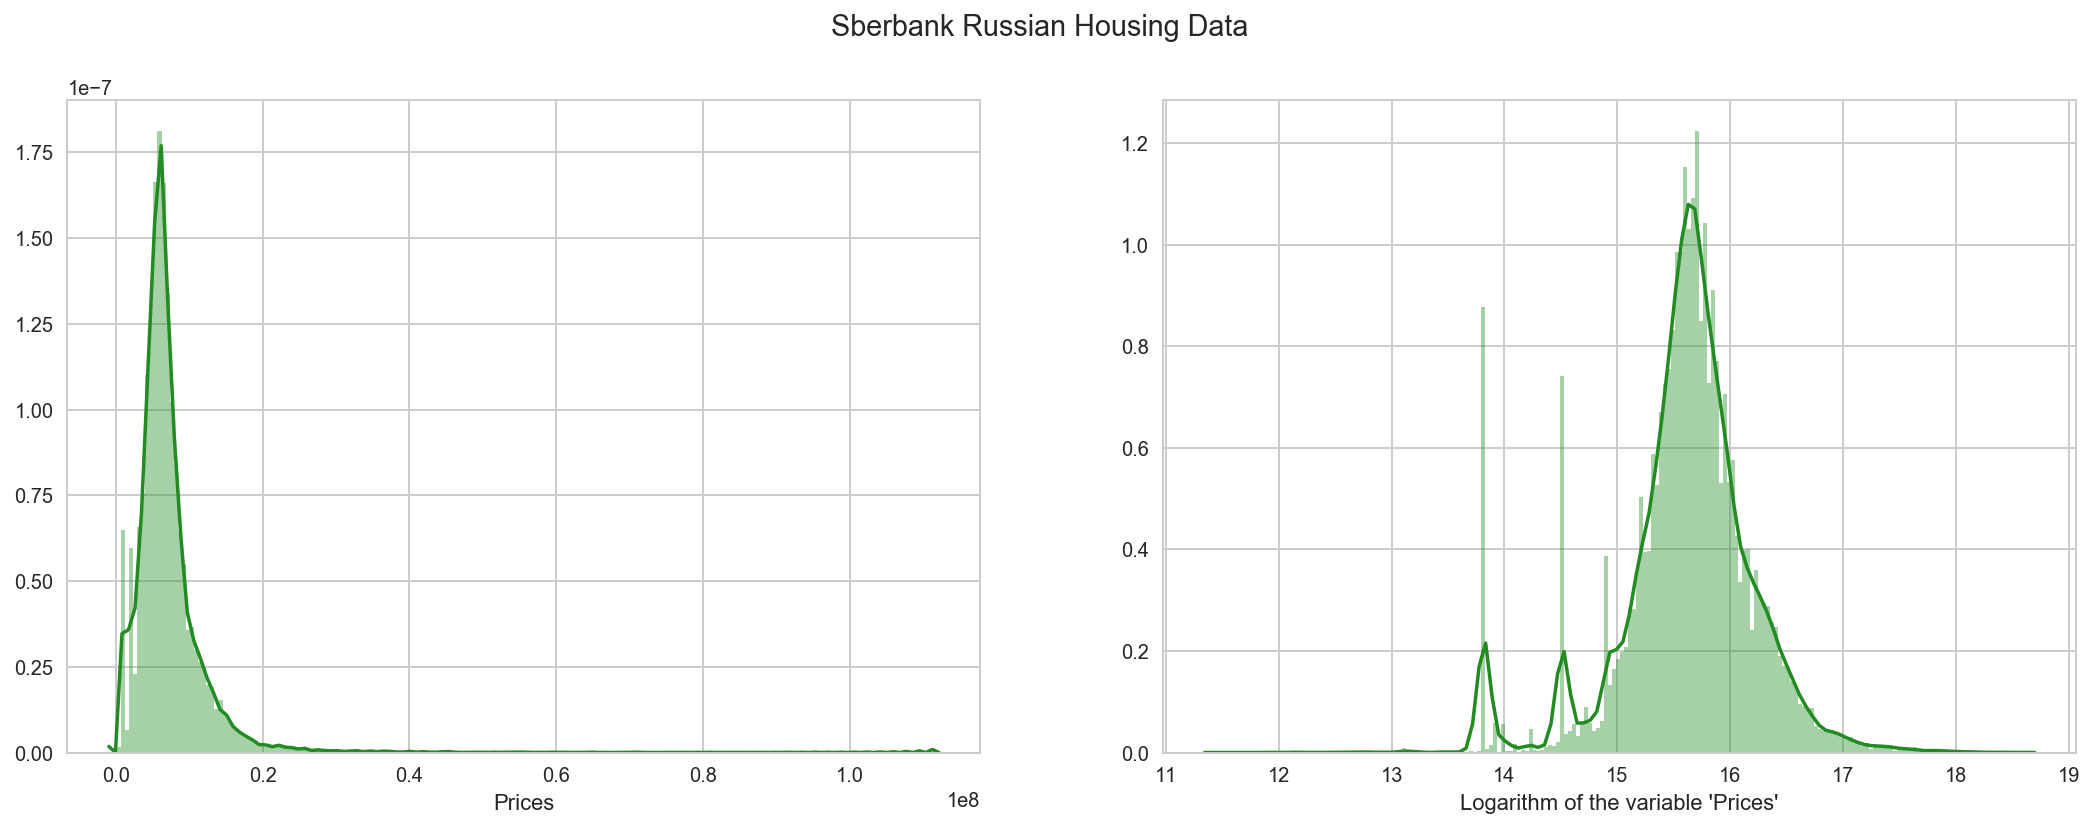

In [347]:
hide_code
plt.style.use('seaborn-whitegrid')
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.distplot(target_train, bins=200, color='#228B22', ax=ax1)
ax1.set_xlabel("Prices")

sns.distplot(np.log(target_train), bins=200, color='#228B22', ax=ax2)
ax2.set_xlabel("Logarithm of the variable 'Prices'")

plt.suptitle('Sberbank Russian Housing Data');

In [348]:
hide_code
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = ", len(target_train))
print ("Number of features = ", len(list(train[X_list_num+X_list_cat].keys())))
print ("Minimum house price = ", np.min(target_train))
print ("Maximum house price = ", np.max(target_train))
print ("Mean house price = ", "%.2f" % np.mean(target_train))
print ("Median house price = ", "%.2f" % np.median(target_train))
print ("Standard deviation of house prices =", "%.2f" % np.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses =  30471
Number of features =  44
Minimum house price =  100000
Maximum house price =  111111112
Mean house price =  7123035.28
Median house price =  6274411.00
Standard deviation of house prices = 4780032.89


### 5.2 Fill in Missing Values

In [349]:
hide_code
train[X_list_num].isnull().sum()

timestamp                               0
full_sq                                 0
num_room                             9572
area_m                                  0
kremlin_km                              0
big_road2_km                            0
big_road1_km                            0
workplaces_km                           0
stadium_km                              0
swim_pool_km                            0
fitness_km                              0
detention_facility_km                   0
cemetery_km                             0
radiation_km                            0
oil_chemistry_km                        0
theater_km                              0
exhibition_km                           0
museum_km                               0
park_km                                 0
public_healthcare_km                    0
metro_min_walk                         25
metro_km_avto                           0
bus_terminal_avto_km                    0
public_transport_station_min_walk 

In [350]:
hide_code
train[X_list_num].isnull().sum()

timestamp                               0
full_sq                                 0
num_room                             9572
area_m                                  0
kremlin_km                              0
big_road2_km                            0
big_road1_km                            0
workplaces_km                           0
stadium_km                              0
swim_pool_km                            0
fitness_km                              0
detention_facility_km                   0
cemetery_km                             0
radiation_km                            0
oil_chemistry_km                        0
theater_km                              0
exhibition_km                           0
museum_km                               0
park_km                                 0
public_healthcare_km                    0
metro_min_walk                         25
metro_km_avto                           0
bus_terminal_avto_km                    0
public_transport_station_min_walk 

In [351]:
hide_code
df_train = pd.DataFrame(train, columns=X_list_num)
df_train_cat = pd.DataFrame(train, columns=X_list_num+X_list_cat)

df_test = pd.DataFrame(test, columns=X_list_num)
df_test_cat = pd.DataFrame(test, columns=X_list_num+X_list_cat)

df_train['prices'] = target_train
df_train_cat['prices'] = target_train

df_train = df_train.dropna(subset=['num_room'])
df_train_cat = df_train_cat.dropna(subset=['num_room'])

df_train['metro_min_walk'] = \
df_train['metro_min_walk'].interpolate(method='linear')
df_train_cat['metro_min_walk'] = \
df_train_cat['metro_min_walk'].interpolate(method='linear')

df_train['railroad_station_walk_min'] = \
df_train['railroad_station_walk_min'].interpolate(method='linear')
df_train_cat['railroad_station_walk_min'] = \
df_train_cat['railroad_station_walk_min'].interpolate(method='linear')

df_test['metro_min_walk'] = \
df_test['metro_min_walk'].interpolate(method='linear')
df_test_cat['metro_min_walk'] = \
df_test_cat['metro_min_walk'].interpolate(method='linear')

df_test['railroad_station_walk_min'] = \
df_test['railroad_station_walk_min'].interpolate(method='linear')
df_test_cat['railroad_station_walk_min'] = \
df_test_cat['railroad_station_walk_min'].interpolate(method='linear')

len(df_train)

20899

### 5.3 Macro and Categorical Features
#### Add the Macro Feature

In [352]:
hide_code
usdrub_pairs = dict(zip(list(macro['timestamp']), list(macro['usdrub'])))
# salary_pairs = dict(zip(list(macro['timestamp']), list(macro['salary'])))

df_train['timestamp'].replace(usdrub_pairs,inplace=True)
df_train_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_test['timestamp'].replace(usdrub_pairs,inplace=True)
df_test_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_train.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_train_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

df_test.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_test_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

#### Preprocess Categorical Features

In [353]:
hide_code
for df in [df_train_cat, df_test_cat]:
    print ("____________________________________________")
    
    print('sub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))

____________________________________________
sub area
Number of categories: 146
{'Savelovskoe', 'Izmajlovo', 'Kotlovka', 'Dorogomilovo', 'Poselenie Marushkinskoe', 'Strogino', "Zamoskvorech'e", 'Jakimanka', 'Nagornoe', 'Mitino', 'Poselenie Kievskij', 'Vojkovskoe', 'Severnoe Tushino', 'Chertanovo Juzhnoe', "Kon'kovo", 'Matushkino', 'Basmannoe', 'Poselenie Rjazanovskoe', 'Presnenskoe', 'Poselenie Desjonovskoe', 'Begovoe', 'Staroe Krjukovo', 'Bibirevo', 'Danilovskoe', 'Chertanovo Severnoe', 'Jasenevo', 'Poselenie Mosrentgen', 'Hamovniki', 'Orehovo-Borisovo Juzhnoe', 'Vyhino-Zhulebino', 'Filevskij Park', 'Jaroslavskoe', 'Novokosino', 'Hovrino', "Moskvorech'e-Saburovo", 'Beskudnikovskoe', 'Ramenki', "Mar'ino", 'Rjazanskij', 'Teplyj Stan', 'Severnoe Butovo', 'Taganskoe', 'Vostochnoe', 'Vnukovo', 'Zjablikovo', 'Butyrskoe', 'Troparevo-Nikulino', 'Poselenie Vnukovskoe', 'Zjuzino', 'Cheremushki', 'Ajeroport', 'Shhukino', 'Birjulevo Zapadnoe', 'Poselenie Voronovskoe', 'Poselenie Pervomajskoe', 'K

In [354]:
hide_code
for feature in X_list_cat:
    for element in list(set(df_test_cat[feature])):
        if element not in list(set(df_train_cat[feature])): 
            print (feature, element)      

ID_metro 224


In [355]:
hide_code
ID_metro_cat = pd.factorize(df_train_cat['ID_metro'])
df_train_cat['ID_metro'] = ID_metro_cat[0]

ID_metro_pairs = dict(zip(list(ID_metro_cat[1]), list(set(ID_metro_cat[0]))))
ID_metro_pairs[224] = 219

df_test_cat['ID_metro'].replace(ID_metro_pairs,inplace=True)

In [356]:
hide_code
for feature in X_list_cat:
    if feature !='ID_metro':
        feature_cat = pd.factorize(df_train_cat[feature])
        df_train_cat[feature] = feature_cat[0]
        feature_pairs = dict(zip(list(feature_cat[1]), list(set(feature_cat[0]))))
        df_test_cat[feature].replace(feature_pairs,inplace=True)

In [357]:
hide_code
for df in [df_train_cat, df_test_cat]:
    print ("____________________________________________")
    
    print('sub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))

____________________________________________
sub area
Number of categories: 146
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}

ID metro
Number of categories: 219
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [358]:
hide_code
df_train_cat1 = df_train_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_train_cat[[column]])
    transform = encode.transform(df_train_cat[[column]])
    
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_train_cat[column].value_counts().index])
    transform = transform.set_index(df_train_cat.index.values)
    
    df_train_cat1 = pd.concat([df_train_cat1, transform], axis=1)
    df_train_cat1 = df_train_cat1.drop(column, 1)

In [359]:
hide_code
df_test_cat1 = df_test_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_test_cat[[column]])
    transform = encode.transform(df_test_cat[[column]])
    
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_test_cat[column].value_counts().index])
    transform = transform.set_index(df_test_cat.index.values)
    
    df_test_cat1 = pd.concat([df_test_cat1, transform], axis=1)
    df_test_cat1 = df_test_cat1.drop(column, 1)

#### Check Encoding

In [360]:
hide_code
df_train_cat1.iloc[:, 623:636][:3].as_matrix()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [361]:
hide_code
df_train_cat['preschool_education_centers_raion'][:3]

7672    0
8056    1
8111    2
Name: preschool_education_centers_raion, dtype: int64

#### Add Missing Columns with Zero Values

In [363]:
hide_code
print('Shape of the train data frame:', df_train_cat1.shape)
print('Shape of the test data frame:', df_test_cat1.shape)

Shape of the train data frame: (20899, 636)
Shape of the test data frame: (7662, 626)


In [364]:
hide_code
print("Features in the train data, but not in the test data:")
for element in list(df_train_cat1):
    if element not in list(df_test_cat1):
        print(element)

Features in the train data, but not in the test data:
prices
sub_area_136
ID_metro_188
ID_metro_205
ID_metro_216
ID_metro_214
ID_metro_183
ID_metro_179
ID_metro_153
ID_metro_217
raion_popul_136


In [365]:
hide_code
print("Features in the test data, but not in the train data:")
for element in list(df_test_cat1):
    if element not in list(df_train_cat1):
        print(element)

Features in the test data, but not in the train data:
ID_metro_219


In [368]:
hide_code
for column in ['sub_area_136',' ID_metro_188', 'ID_metro_205', 'ID_metro_216', 'ID_metro_214',
              'ID_metro_183',' ID_metro_179', 'ID_metro_153', 'ID_metro_217', 'raion_popul_136']:
    df_test_cat1[column] = 0
    
df_train_cat1['ID_metro_219'] = 0

print('Columns with zero values were added.\n')
print('Shape of the train data frame:', df_train_cat1.shape)
print('Shape of the test data frame:', df_test_cat1.shape)

Columns with zero values were added.

Shape of the train data frame: (20899, 637)
Shape of the test data frame: (7662, 636)


### 5.4 Display Correlation

In [369]:
hide_code
pearson = df_train.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

full_sq                              0.593829
num_room                             0.476337
kremlin_km                          -0.290126
stadium_km                          -0.238431
detention_facility_km               -0.233395
university_km                       -0.222964
theater_km                          -0.222873
workplaces_km                       -0.220889
swim_pool_km                        -0.220480
exhibition_km                       -0.212144
radiation_km                        -0.208256
museum_km                           -0.203846
park_km                             -0.201636
metro_min_walk                      -0.200058
fitness_km                          -0.197702
metro_km_avto                       -0.194751
shopping_centers_km                 -0.182459
public_healthcare_km                -0.182388
big_road2_km                        -0.178865
bus_terminal_avto_km                -0.176601
ekder_all                            0.169331
area_m                            

### 5.5 Scale, Shuffle and Split the Data

In [370]:
hide_code
target_train = df_train['prices'].as_matrix()

features_train = df_train.drop('prices', 1).as_matrix()
features_test = df_test.as_matrix()

features_train_cat = df_train_cat.drop('prices', 1).as_matrix()
features_test_cat = df_test_cat.as_matrix()

features_train_cat_enc = df_train_cat1.drop('prices', 1).as_matrix()
features_test_cat_enc = df_test_cat1.as_matrix()

In [371]:
hide_code
print('Numeric Features')
X_train, X_test, y_train, y_test = \
train_test_split(features_train, target_train, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

Numeric Features


((16719, 36), (4180, 36))

In [372]:
hide_code
print('Numeric and Categorical Features')
X_train_cat, X_test_cat, y_train_cat, y_test_cat = \
train_test_split(features_train_cat, target_train, test_size = 0.2, random_state = 1)
X_train_cat.shape, X_test_cat.shape

Numeric and Categorical Features


((16719, 44), (4180, 44))

In [373]:
hide_code
print('Numeric and Encoded Categorical Features')
X_train_cat_enc, X_test_cat_enc, y_train_cat_enc, y_test_cat_enc = \
train_test_split(features_train_cat_enc, target_train, test_size = 0.2, random_state = 1)
X_train_cat_enc.shape, X_test_cat_enc.shape

Numeric and Encoded Categorical Features


((16719, 636), (4180, 636))

In [374]:
hide_code
scale_X = RobustScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

scale_y = RobustScaler()
y_train = scale_y.fit_transform(y_train.reshape(-1,1))
y_test = scale_y.transform(y_test.reshape(-1,1))

scale_X_cat = RobustScaler()
X_train_cat = scale_X_cat.fit_transform(X_train_cat)
X_test_cat = scale_X_cat.transform(X_test_cat)

scale_y_cat = RobustScaler()
y_train_cat = scale_y_cat.fit_transform(y_train_cat.reshape(-1,1))
y_test_cat = scale_y_cat.transform(y_test_cat.reshape(-1,1))

scale_X_cat_enc = RobustScaler()
X_train_cat_enc = scale_X_cat_enc.fit_transform(X_train_cat_enc)
X_test_cat_enc = scale_X_cat_enc.transform(X_test_cat_enc)

scale_y_cat_enc = RobustScaler()
y_train_cat_enc = scale_y_cat_enc.fit_transform(y_train_cat_enc.reshape(-1,1))
y_test_cat_enc = scale_y_cat_enc.transform(y_test_cat_enc.reshape(-1,1))

---
## $\mathfrak {\color{#228B22} {6. \ Benchmark \ Models }}$
### 6.1 Regressors; Scikit-Learn
#### Tuning Parameters

In [178]:
hide_code
print('Numeric Features')
print ('Gradient Boosting Regressor')
param_grid_gbr = {'max_depth': [3, 4, 5], 'n_estimators': range(36, 361, 36)}
gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), 
                              param_grid_gbr, n_jobs=5).fit(X_train, y_train)

gridsearch_gbr.best_params_

Numeric Features
Gradient Boosting Regressor


{'max_depth': 4, 'n_estimators': 324}

In [179]:
hide_code
print ('Bagging Regressor')
param_grid_br = {'n_estimators': range(36, 361, 36)}
gridsearch_br = GridSearchCV(BaggingRegressor(), 
                             param_grid_br, n_jobs=5).fit(X_train, y_train)

gridsearch_br.best_params_

Bagging Regressor


{'n_estimators': 252}

In [182]:
hide_code
print('Numeric and Categorical Features')
print ('Gradient Boosting Regressor')
param_grid_gbr_cat = {'max_depth': [3, 4, 5], 'n_estimators': range(44, 441, 44)}
gridsearch_gbr_cat = GridSearchCV(GradientBoostingRegressor(), 
                                  param_grid_gbr_cat, n_jobs=5).fit(X_train_cat, y_train_cat)

gridsearch_gbr_cat.best_params_

Numeric and Categorical Features
Gradient Boosting Regressor


{'max_depth': 3, 'n_estimators': 396}

In [183]:
hide_code
print ('Bagging Regressor')
param_grid_br_cat = {'n_estimators': range(44, 441, 44)}
gridsearch_br_cat = GridSearchCV(BaggingRegressor(), 
                                 param_grid_br_cat, n_jobs=5).fit(X_train_cat, y_train_cat)

gridsearch_br_cat.best_params_

Bagging Regressor


{'n_estimators': 220}

In [ ]:
hide_code
print('Numeric and Encoded Categorical Features')
print ('Gradient Boosting Regressor')
param_grid_gbr_cat_enc = {'max_depth': [3, 4, 5], 'n_estimators': [159, 318, 636]}
gridsearch_gbr_cat_enc = GridSearchCV(GradientBoostingRegressor(), 
                                      param_grid_gbr_cat_enc, 
                                      n_jobs=5).fit(X_train_cat_enc, y_train_cat_enc)

gridsearch_gbr_cat_enc.best_params_

In [ ]:
hide_code
print ('Bagging Regressor')
param_grid_br_cat_enc = {'n_estimators': [159, 318, 636]}
gridsearch_br_cat_enc = GridSearchCV(BaggingRegressor(), 
                                     param_grid_br_cat_enc, 
                                     n_jobs=5).fit(X_train_cat_enc, y_train_cat_enc)

gridsearch_br_cat_enc.best_params_

#### Fit the Regressors

In [161]:
hide_code
print('Numeric Features')
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(max_depth=4, n_estimators=324), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(n_estimators=252), 
                                   X_train, X_test, y_train)

scores('GradientBoostingRegressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('BaggingRegressor', y_train, y_test, y_train_br, y_test_br)

Numeric Features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.855530070581
EV score. Test:  0.72234622242
---------
R2 score. Train:  0.855530070581
R2 score. Test:  0.722253924242
---------
MSE score. Train:  0.262730060681
MSE score. Test:  0.555743202191
---------
MAE score. Train:  0.321120239214
MAE score. Test:  0.401217759953
---------
MdAE score. Train:  0.177081374557
MdAE score. Test:  0.197979200083
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.95575337015
EV score. Test:  0.718517223838
---------
R2 score. Train:  0.955727918474
R2 score. Test:  0.718175393641
---------
MSE score. Train:  0.0805123025427
MSE score. Test:  0.563903949919
---------
MAE score. Train:  0.147460182166
MAE score. Test:  0.391740925778
---------
MdAE score. Train:  0.0635813966049
MdAE score. Test:  0.176129672435


In [162]:
hide_code
print('Numeric and Categorical Features')
y_train_cat_gbr, y_test_cat_gbr = \
regression(GradientBoostingRegressor(max_depth=3, n_estimators=396), X_train_cat, X_test_cat, y_train_cat)

y_train_cat_br, y_test_cat_br = \
regression(BaggingRegressor(n_estimators=220), X_train_cat, X_test_cat, y_train_cat)

scores('GradientBoostingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_gbr, y_test_cat_gbr)
scores('BaggingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_br, y_test_cat_br)

Numeric and Categorical Features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.819256487057
EV score. Test:  0.716874289199
---------
R2 score. Train:  0.819256487057
R2 score. Test:  0.716796088565
---------
MSE score. Train:  0.328696458248
MSE score. Test:  0.566663806805
---------
MAE score. Train:  0.352419590753
MAE score. Test:  0.407246440449
---------
MdAE score. Train:  0.190394737254
MdAE score. Test:  0.204830286582
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.955267815304
EV score. Test:  0.724807227949
---------
R2 score. Train:  0.95524323459
R2 score. Test:  0.7244451373
---------
MSE score. Train:  0.0813937387479
MSE score. Test:  0.551358795471
---------
MAE score. Train:  0.148001669778
MAE score. Test:  0.390822398403
---------
MdAE score. Train:  0.0639870430135
MdAE score. Test:  0.177183940657


In [153]:
hide_code
print('Numeric and Encoded Categorical Features')
y_train_cat_enc_gbr, y_test_cat_enc_gbr = \
regression(GradientBoostingRegressor(max_depth=3, n_estimators=159), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

y_train_cat_enc_br, y_test_cat_enc_br = \
regression(BaggingRegressor(n_estimators=159), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

scores('GradientBoostingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_gbr, y_test_cat_enc_gbr)
scores('BaggingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_br, y_test_cat_enc_br)

Numeric and Encoded Categorical Features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.769881646987
EV score. Test:  0.709671098204
---------
R2 score. Train:  0.769881646987
R2 score. Test:  0.709626818228
---------
MSE score. Train:  0.418488533179
MSE score. Test:  0.58100882768
---------
MAE score. Train:  0.390531067732
MAE score. Test:  0.419426191844
---------
MdAE score. Train:  0.205749300262
MdAE score. Test:  0.217590604442
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.955403036635
EV score. Test:  0.718446996195
---------
R2 score. Train:  0.955375752674
R2 score. Test:  0.718035563075
---------
MSE score. Train:  0.0811527440697
MSE score. Test:  0.564183737443
---------
MAE score. Train:  0.148018724884
MAE score. Test:  0.39419319355
---------
MdAE score. Train:  0.0644346051712
MdAE score. Test:  0.175905877009


#### MLP Regressors

In [154]:
hide_code
mlpr = MLPRegressor(hidden_layer_sizes=(324,), max_iter=200, 
                    solver='lbfgs', alpha=0.01)
mlpr.fit(X_train, y_train)

y_train_mlpr = mlpr.predict(X_train)
y_test_mlpr = mlpr.predict(X_test)

scores('MLP Regressor; Numeric Features', 
       y_train, y_test, y_train_mlpr, y_test_mlpr)

_______________________________________
MLP Regressor; Numeric Features
_______________________________________
EV score. Train:  0.70110868795
EV score. Test:  0.686313611023
---------
R2 score. Train:  0.701094694861
R2 score. Test:  0.686167610496
---------
MSE score. Train:  0.543583078313
MSE score. Test:  0.627948447583
---------
MAE score. Train:  0.424884071731
MAE score. Test:  0.44289763136
---------
MdAE score. Train:  0.232896980701
MdAE score. Test:  0.246211102619


In [155]:
hide_code
mlpr_cat = MLPRegressor(hidden_layer_sizes=(396,), max_iter=200, 
                        solver='lbfgs', alpha=0.01)
mlpr_cat.fit(X_train_cat, y_train_cat)

y_train_cat_mlpr = mlpr_cat.predict(X_train_cat)
y_test_cat_mlpr = mlpr_cat.predict(X_test_cat)

scores('MLP Regressor; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_mlpr, y_test_cat_mlpr)

_______________________________________
MLP Regressor; Numeric and Categorical Features
_______________________________________
EV score. Train:  0.722801110759
EV score. Test:  0.687163864885
---------
R2 score. Train:  0.722791960701
R2 score. Test:  0.686992171639
---------
MSE score. Train:  0.504124874147
MSE score. Test:  0.626298579988
---------
MAE score. Train:  0.411340810589
MAE score. Test:  0.443598263885
---------
MdAE score. Train:  0.224808917236
MdAE score. Test:  0.239688470961


In [158]:
hide_code
mlpr_cat_enc = MLPRegressor(hidden_layer_sizes=(318,), max_iter=200, 
                            solver='lbfgs', alpha=0.01)
mlpr_cat_enc.fit(X_train_cat_enc, y_train_cat_enc)

y_train_cat_enc_mlpr = mlpr_cat_enc.predict(X_train_cat_enc)
y_test_cat_enc_mlpr = mlpr_cat_enc.predict(X_test_cat_enc)

scores('MLP Regressor; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlpr, y_test_cat_enc_mlpr)

_______________________________________
MLP Regressor; Numeric and Encoded Categorical Features
_______________________________________
EV score. Train:  0.758183427641
EV score. Test:  0.697113545341
---------
R2 score. Train:  0.758156944575
R2 score. Test:  0.696856960999
---------
MSE score. Train:  0.439810837333
MSE score. Test:  0.606560084626
---------
MAE score. Train:  0.396553155791
MAE score. Test:  0.436068740516
---------
MdAE score. Train:  0.217556060257
MdAE score. Test:  0.235057598353


#### Display Predictions

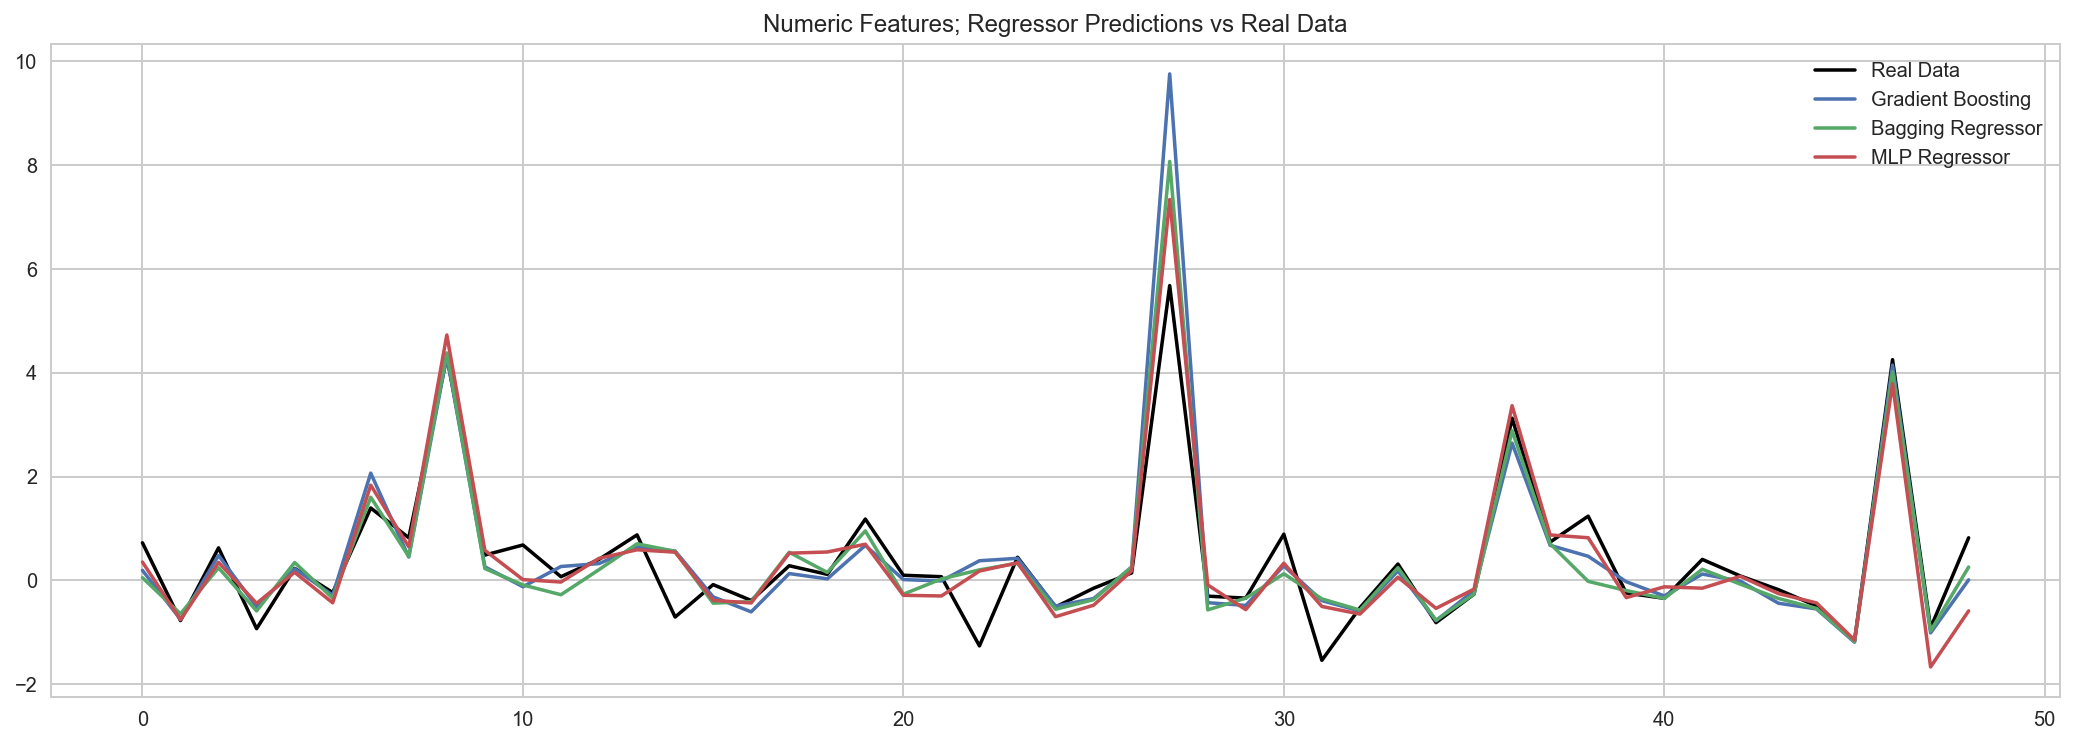

In [165]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_br[1:50], label='Bagging Regressor')
plt.plot(y_test_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric Features; Regressor Predictions vs Real Data");

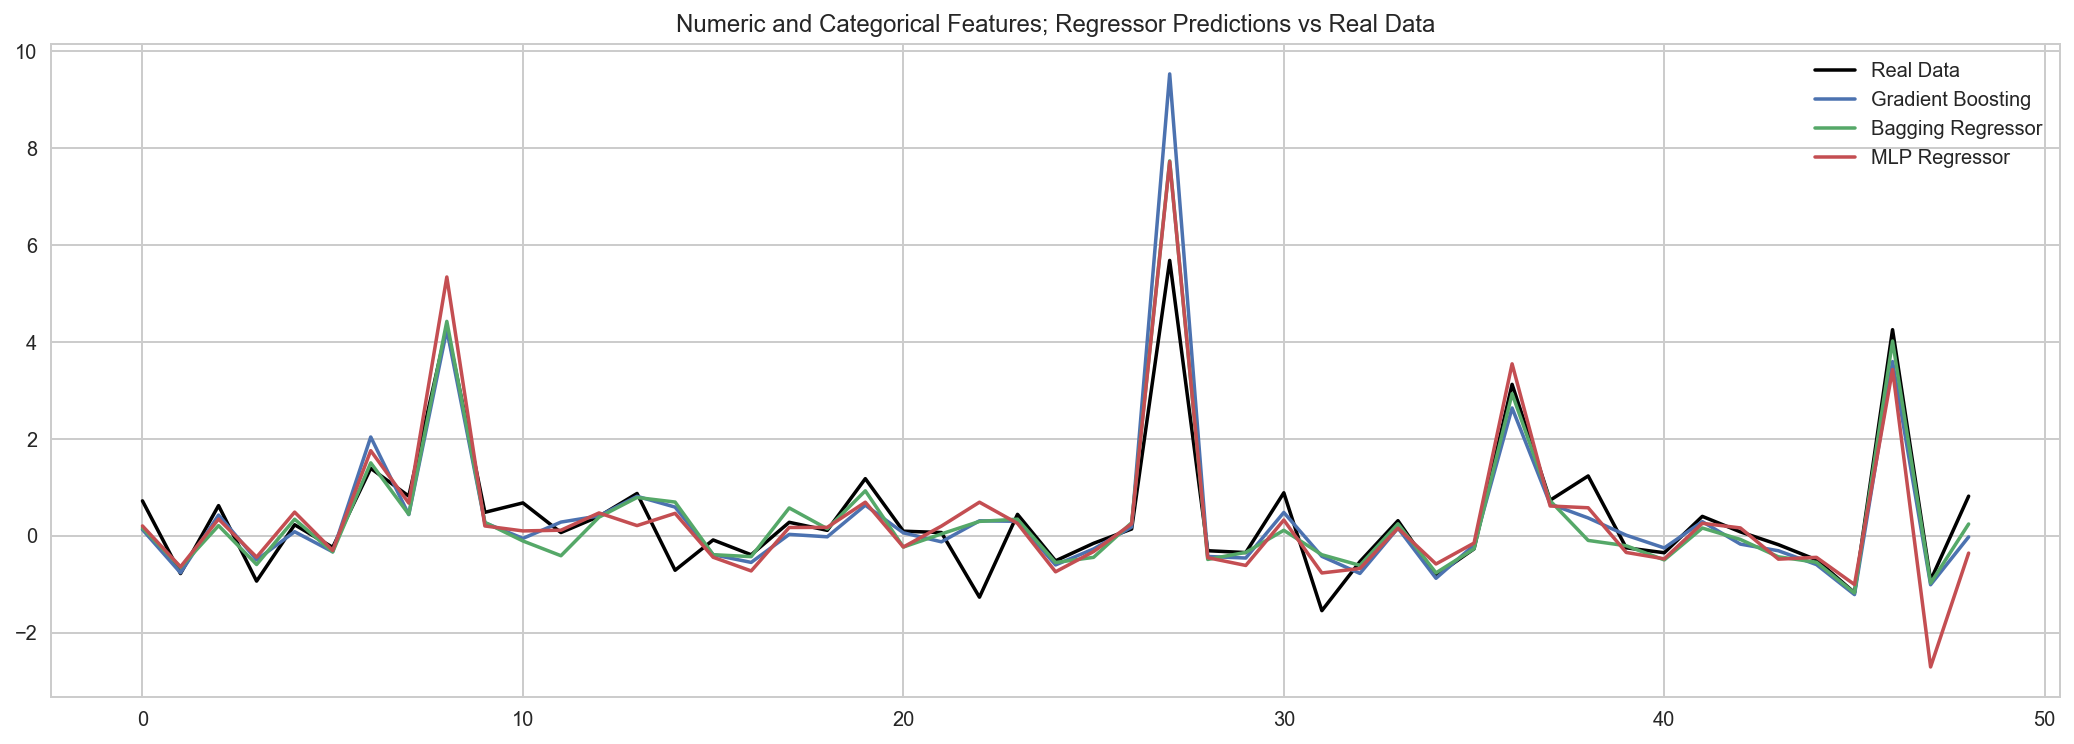

In [166]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric and Categorical Features; Regressor Predictions vs Real Data");

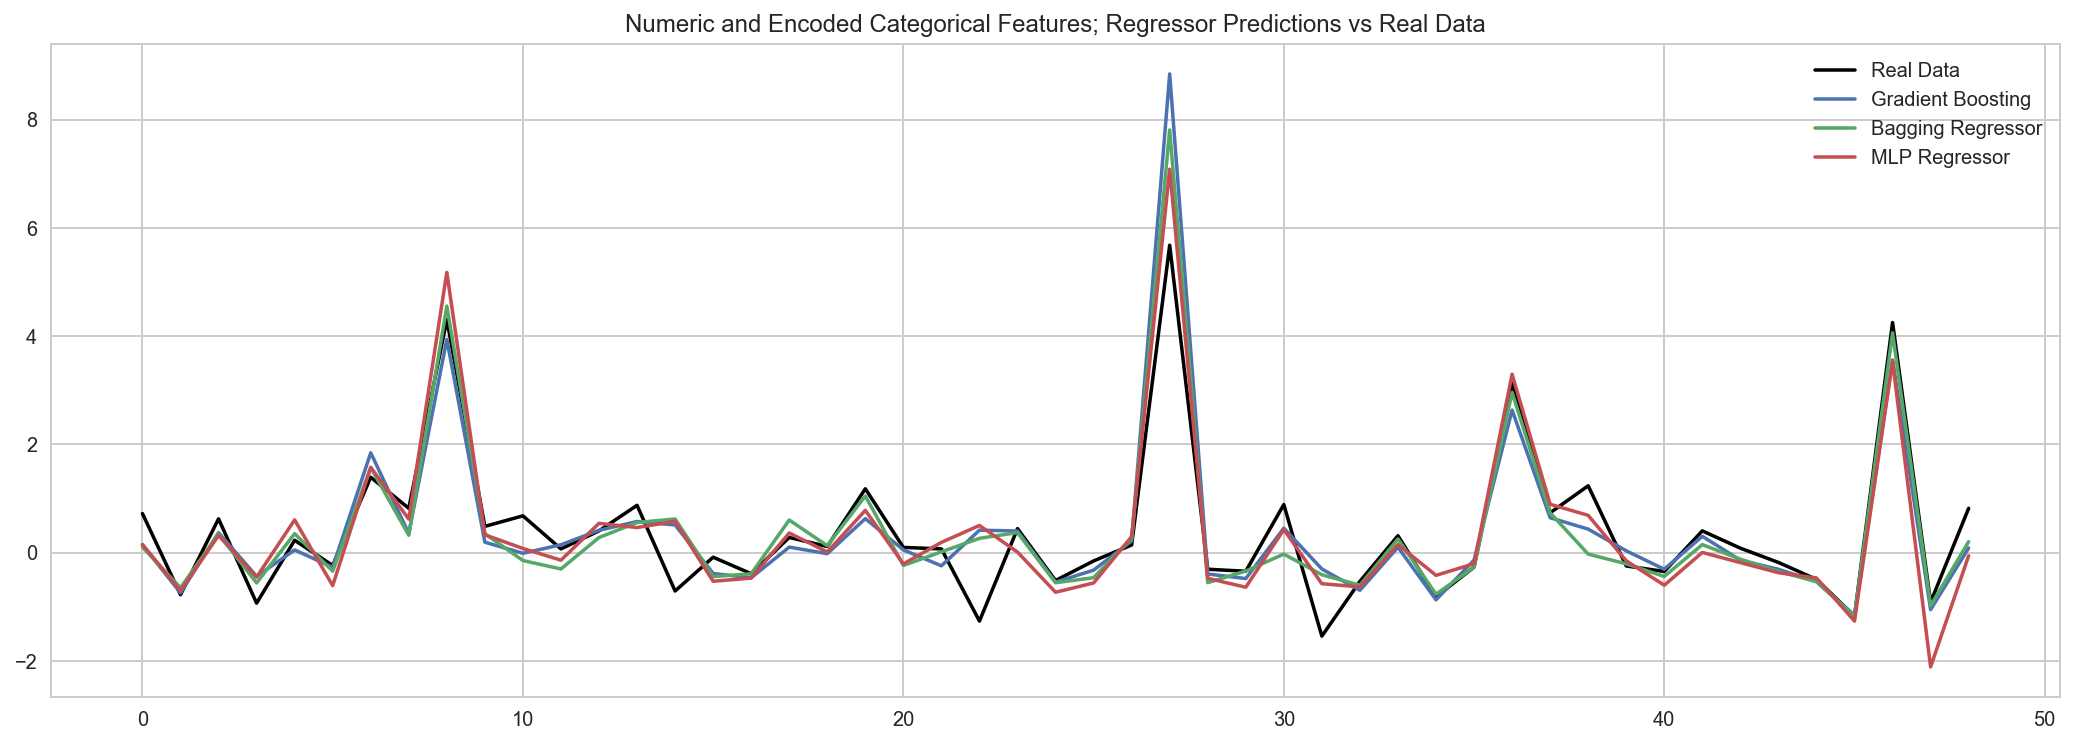

In [167]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat_enc[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Regressor Predictions vs Real Data");

### 6.2 Neural Networks; Keras
#### MLP

In [265]:
hide_code
def mlp_model():
    model = Sequential()
    
    model.add(Dense(36, activation='relu', input_dim=36))
    model.add(Dense(36, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(144, activation='relu'))
    model.add(Dense(144, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(576, activation='relu'))
    model.add(Dense(576, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model = mlp_model()

mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            nb_epoch=20, batch_size=128, verbose=0)

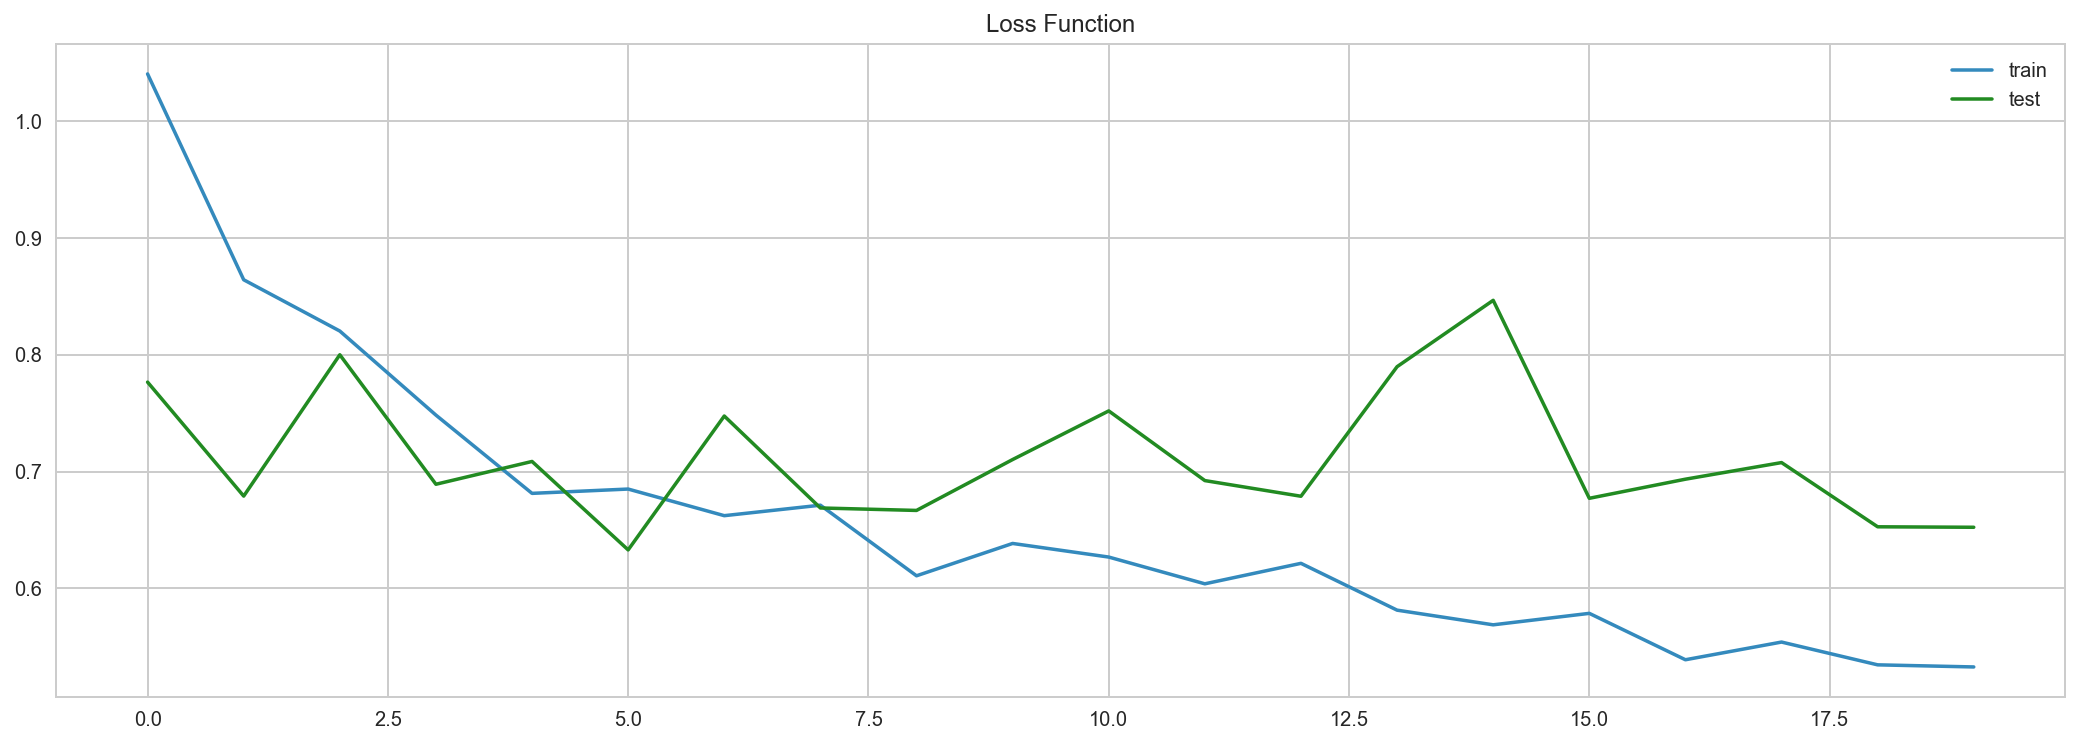

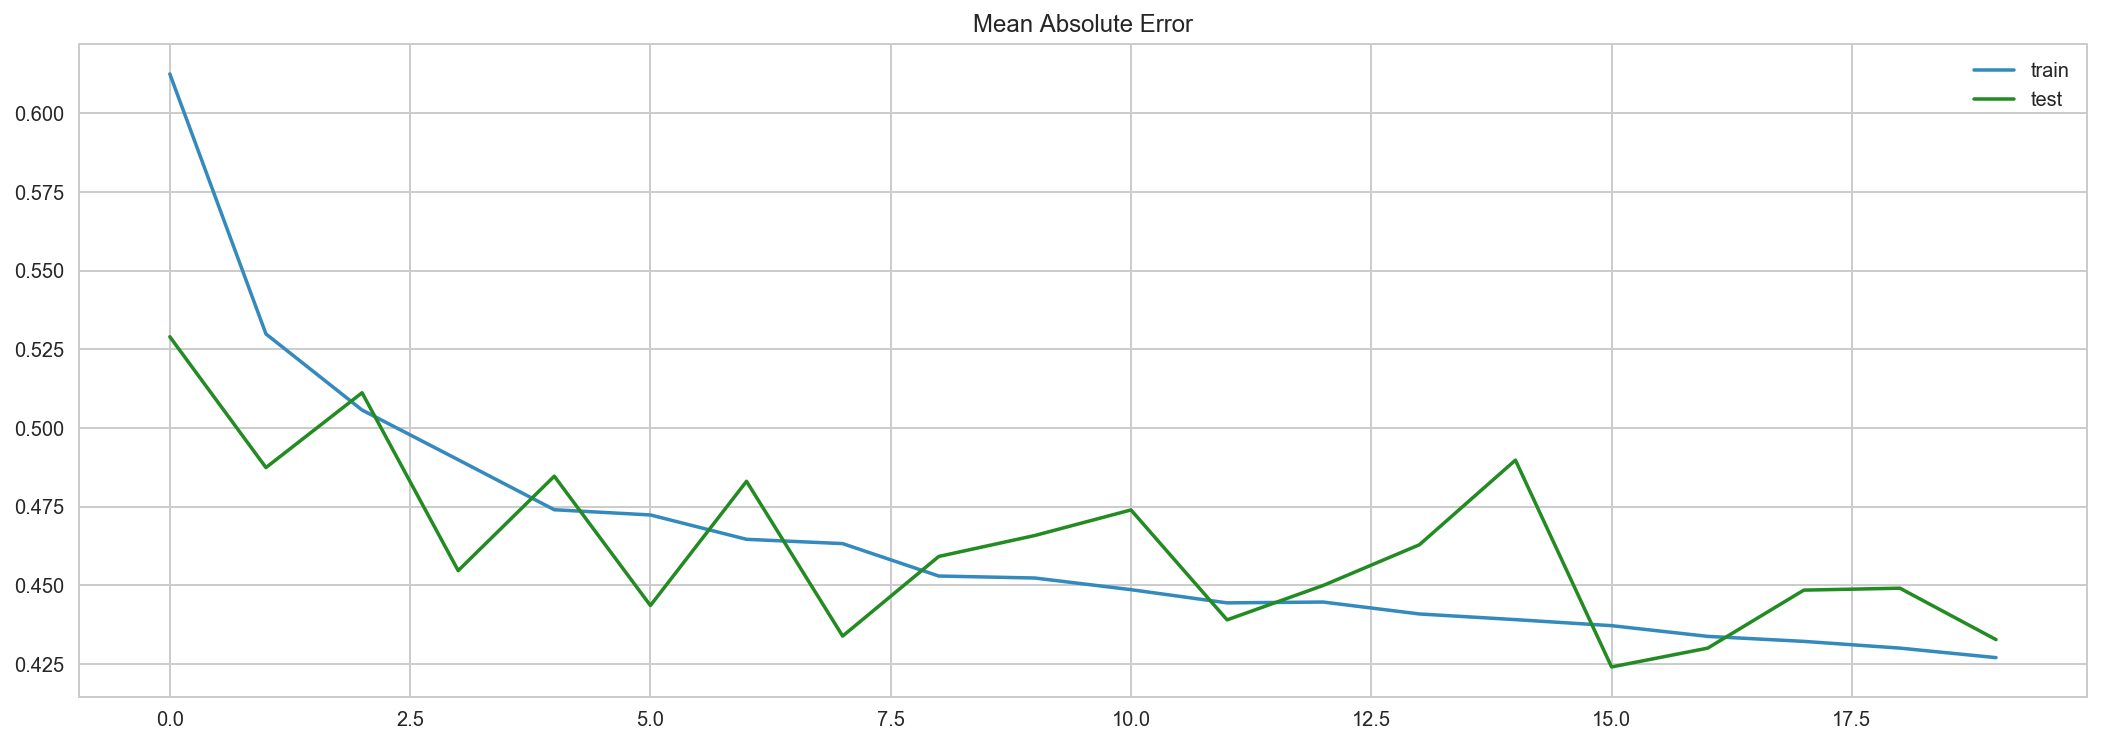

In [266]:
hide_code
loss_plot(mlp_history)
mae_plot(mlp_history)

In [267]:
hide_code
y_train_mlp = mlp_model.predict(X_train)
y_test_mlp = mlp_model.predict(X_test)

scores('MLP Model; Numeric Features', y_train, y_test, y_train_mlp, y_test_mlp)

_______________________________________
MLP Model; Numeric Features
_______________________________________
EV score. Train:  0.747549184479
EV score. Test:  0.674012695609
---------
R2 score. Train:  0.747439021064
R2 score. Test:  0.673973782202
---------
MSE score. Train:  0.459302233956
MSE score. Test:  0.652347125996
---------
MAE score. Train:  0.394938175362
MAE score. Test:  0.432769612262
---------
MdAE score. Train:  0.200053545634
MdAE score. Test:  0.211957850851


In [268]:
hide_code
mlp_model.save('mlp_model_p6_v1.h5')

In [254]:
hide_code
def mlp_cat_model():
    model = Sequential()
    
    model.add(Dense(44, activation='relu', input_dim=44))
    model.add(Dense(44, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(156, activation='relu'))
    model.add(Dense(156, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(624, activation='relu'))
    model.add(Dense(624, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_model = mlp_cat_model()

mlp_cat_history = mlp_cat_model.fit(X_train_cat, y_train_cat, 
                                    validation_data=(X_test_cat, y_test_cat),
                                    nb_epoch=30, batch_size=128, verbose=0)

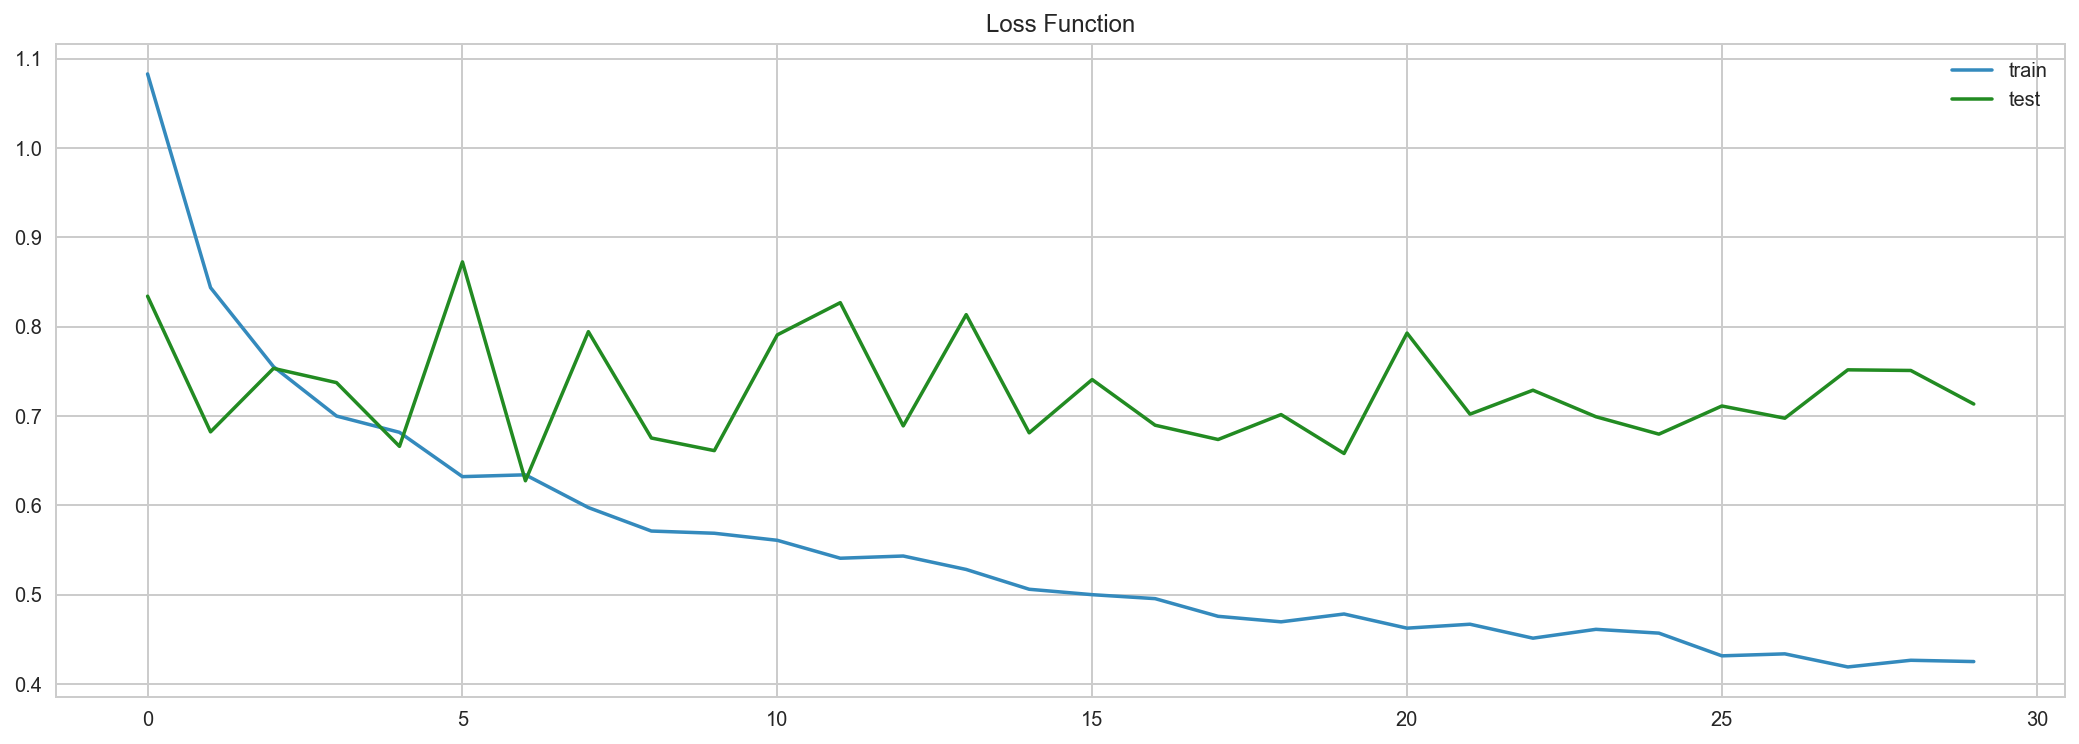

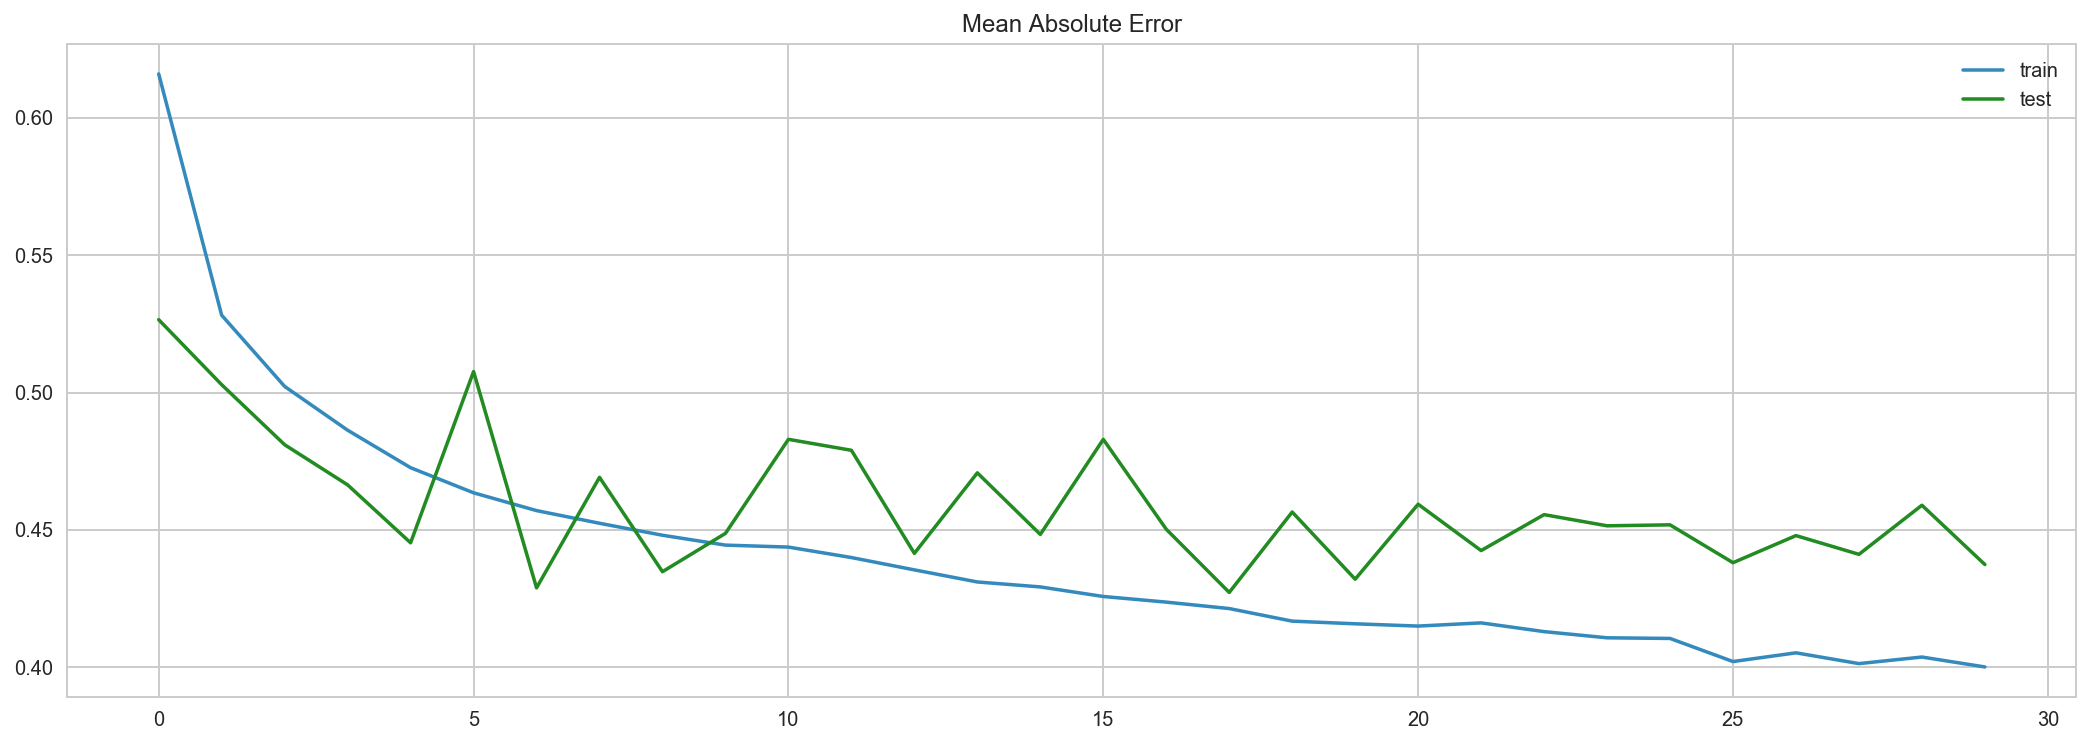

In [255]:
hide_code
loss_plot(mlp_cat_history)
mae_plot(mlp_cat_history)

In [256]:
hide_code
y_train_cat_mlp = mlp_cat_model.predict(X_train_cat)
y_test_cat_mlp = mlp_cat_model.predict(X_test_cat)

scores('MLP Model; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_mlp, y_test_cat_mlp)

_______________________________________
MLP Model; Numeric and Categorical Features
_______________________________________
EV score. Train:  0.809061723792
EV score. Test:  0.643814862998
---------
R2 score. Train:  0.808441408647
R2 score. Test:  0.643445326954
---------
MSE score. Train:  0.348364538785
MSE score. Test:  0.713431630724
---------
MAE score. Train:  0.362274851827
MAE score. Test:  0.43736671911
---------
MdAE score. Train:  0.192381074683
MdAE score. Test:  0.206481557224


In [257]:
hide_code
mlp_cat_model.save('mlp_cat_model_p6_v1.h5')

In [261]:
hide_code
def mlp_cat_enc_model():
    model = Sequential()
    
    model.add(Dense(159, activation='relu', input_dim=636))
    model.add(Dense(159, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(318, activation='relu'))
    model.add(Dense(318, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(636, activation='relu'))
    model.add(Dense(636, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_enc_model = mlp_cat_enc_model()

mlp_cat_enc_history = mlp_cat_enc_model.fit(X_train_cat_enc, y_train_cat_enc, 
                                            validation_data=(X_test_cat_enc, y_test_cat_enc),
                                            nb_epoch=20, batch_size=128, verbose=0)

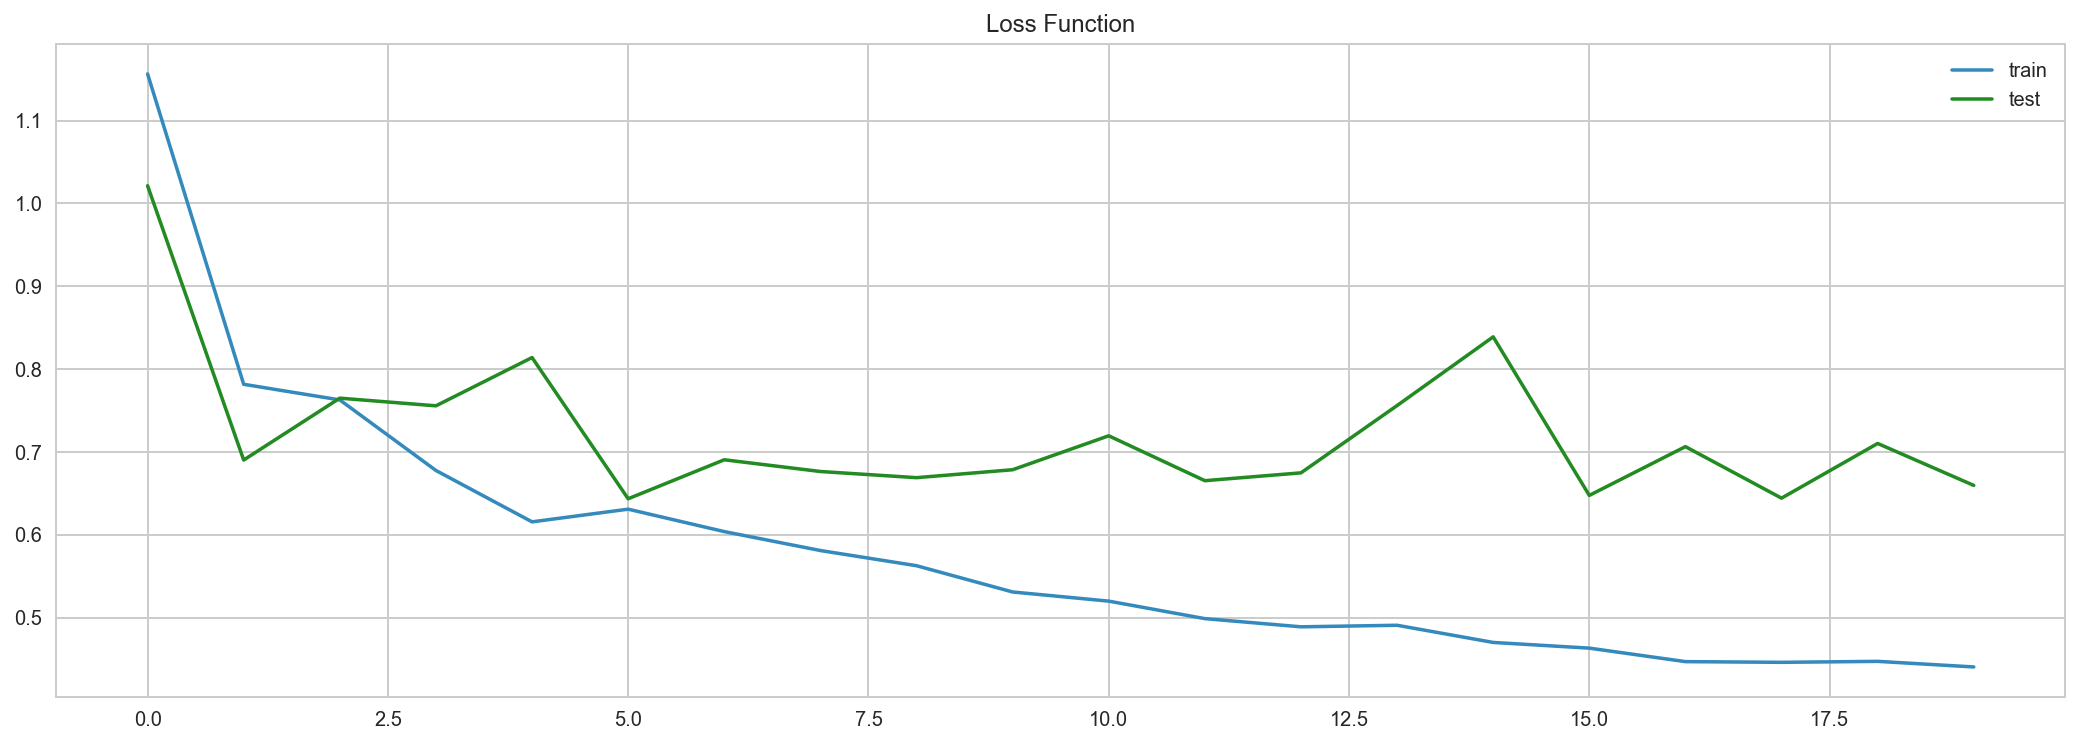

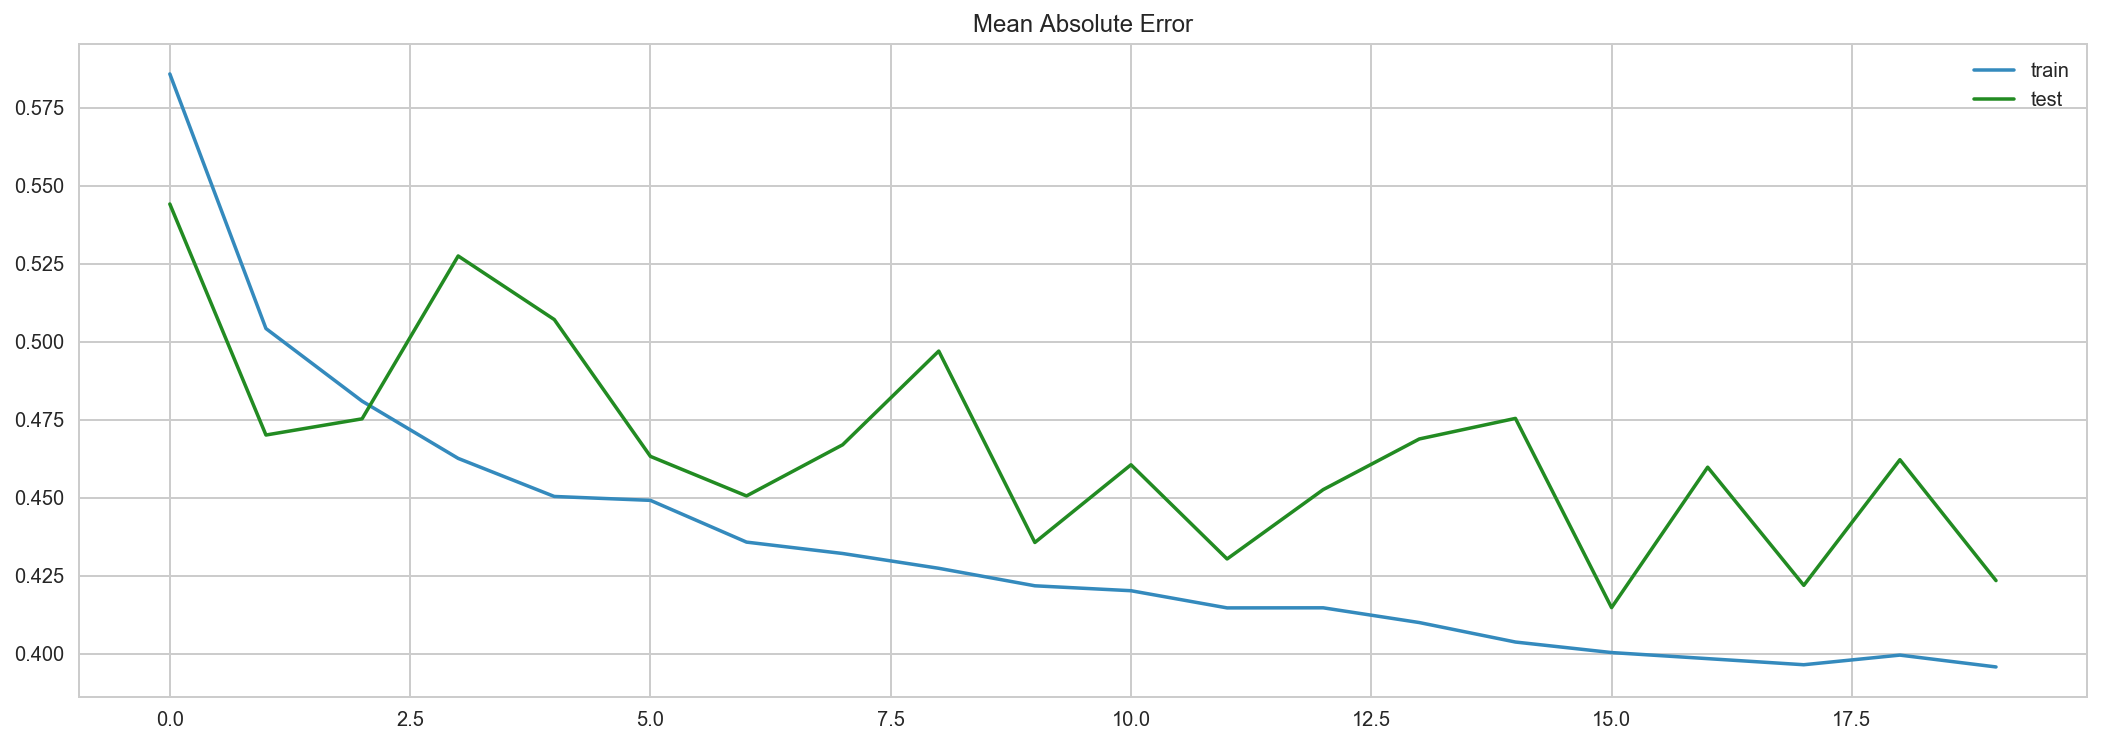

In [262]:
hide_code
loss_plot(mlp_cat_enc_history)
mae_plot(mlp_cat_enc_history)

In [263]:
hide_code
y_train_cat_enc_mlp = mlp_cat_enc_model.predict(X_train_cat_enc)
y_test_cat_enc_mlp = mlp_cat_enc_model.predict(X_test_cat_enc)

scores('MLP Model; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlp, y_test_cat_enc_mlp)

_______________________________________
MLP Model; Numeric and Encoded Categorical Features
_______________________________________
EV score. Train:  0.800733183362
EV score. Test:  0.673925736171
---------
R2 score. Train:  0.795877500694
R2 score. Test:  0.67033328194
---------
MSE score. Train:  0.371213004982
MSE score. Test:  0.659631417116
---------
MAE score. Train:  0.360561647973
MAE score. Test:  0.423397598599
---------
MdAE score. Train:  0.191149538888
MdAE score. Test:  0.208447380847


In [264]:
hide_code
mlp_cat_enc_model.save('mlp_cat_enc_model_p6_v1.h5')

#### CNN

In [273]:
hide_code
def cnn_model():
    model = Sequential()
        
    model.add(Conv1D(36, 5, padding='valid', activation='relu', input_shape=(36, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(144, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(576, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_model = cnn_model()
cnn_history = cnn_model.fit(X_train.reshape(16719, 36, 1), y_train, 
                            epochs=20, batch_size=128, verbose=0,
                            validation_data=(X_test.reshape(4180, 36, 1), y_test))

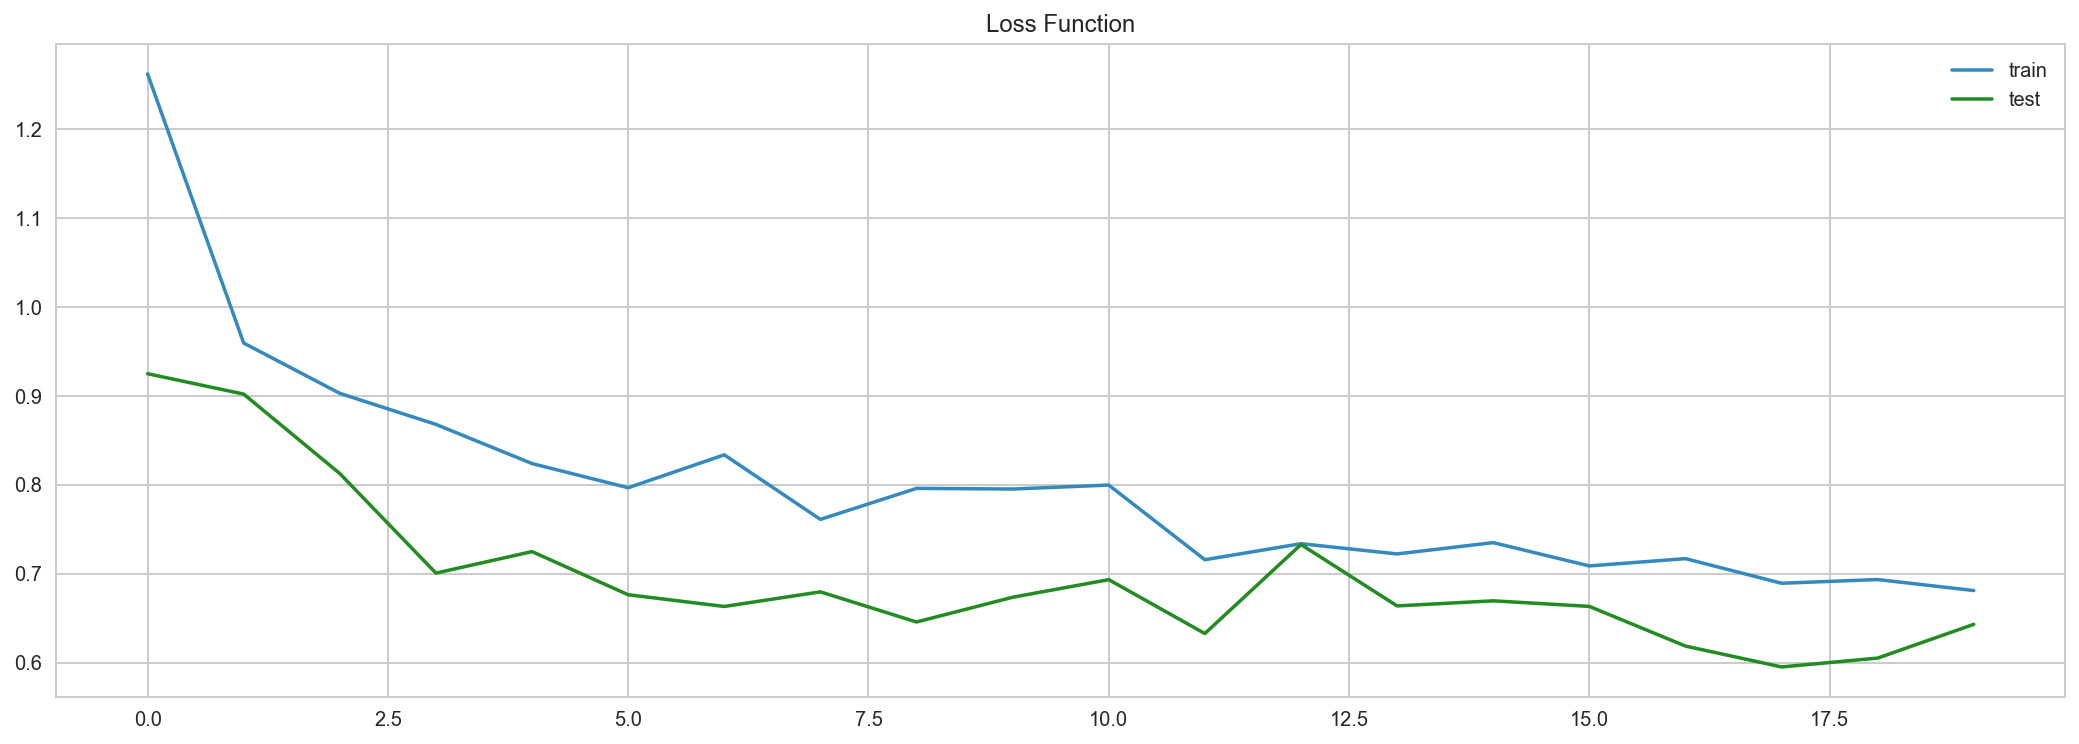

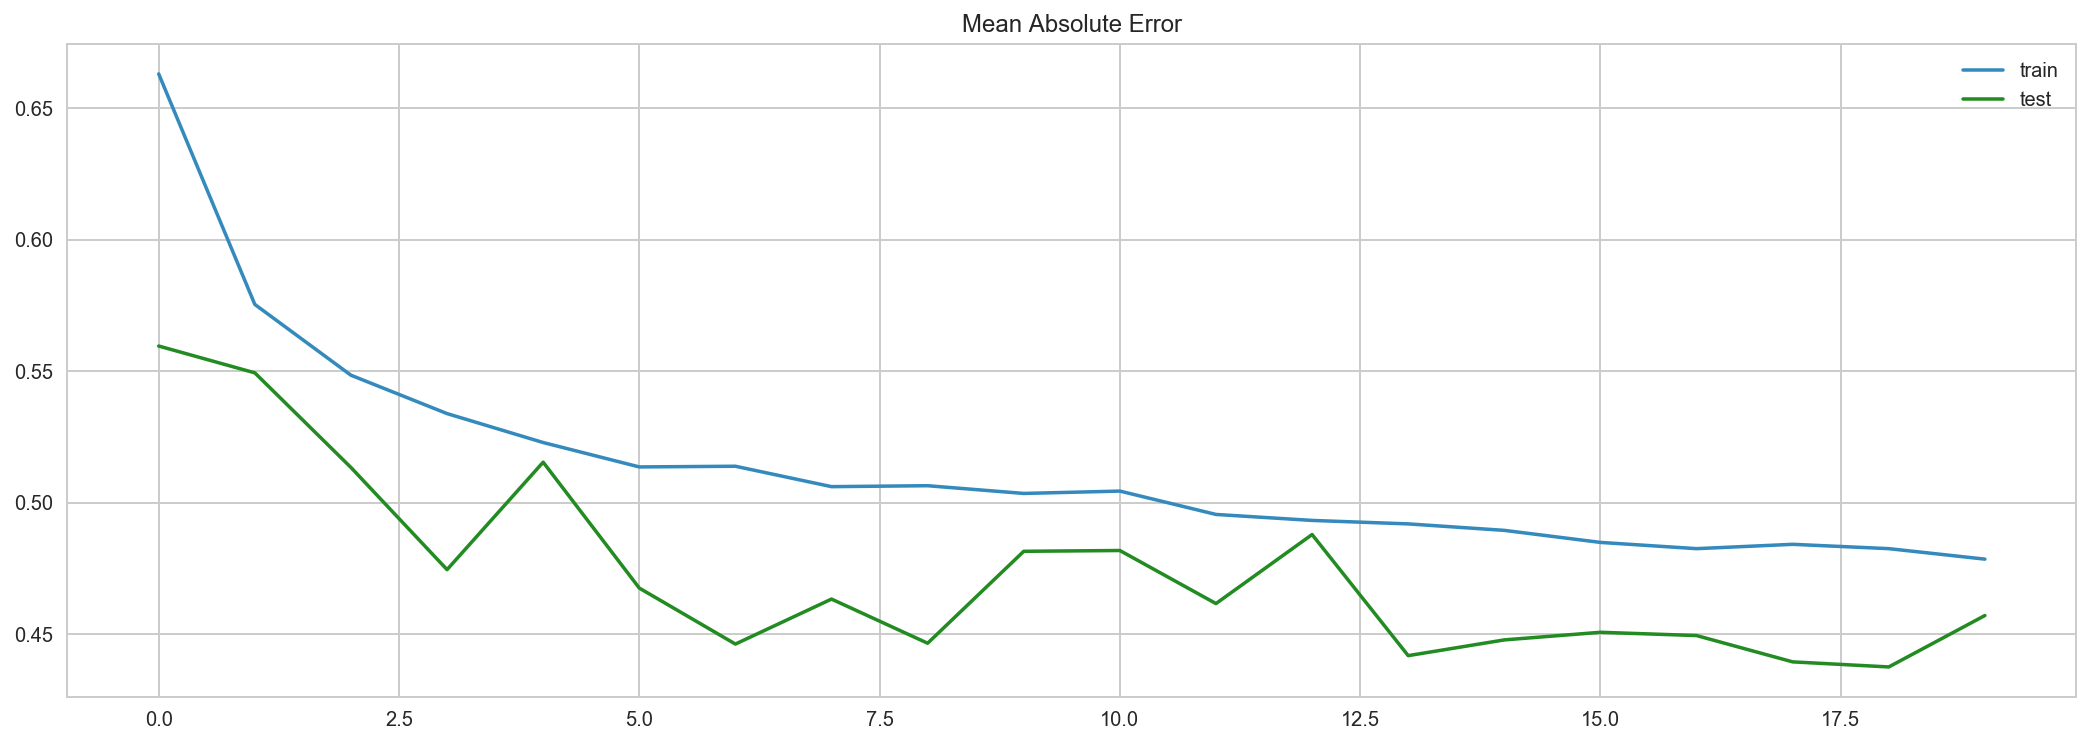

In [274]:
hide_code
loss_plot(cnn_history)
mae_plot(cnn_history)

In [275]:
hide_code
y_train_cnn = cnn_model.predict(X_train.reshape(16719, 36, 1))
y_test_cnn = cnn_model.predict(X_test.reshape(4180, 36, 1))

scores('CNN Model; Numeric Features', y_train, y_test, y_train_cnn, y_test_cnn)

_______________________________________
CNN Model; Numeric Features
_______________________________________
EV score. Train:  0.695867825542
EV score. Test:  0.680187884199
---------
R2 score. Train:  0.694215082877
R2 score. Test:  0.678662541041
---------
MSE score. Train:  0.556094200048
MSE score. Test:  0.642965370216
---------
MAE score. Train:  0.4407979617
MAE score. Test:  0.45719654913
---------
MdAE score. Train:  0.248959454642
MdAE score. Test:  0.257327016327


In [276]:
hide_code
cnn_model.save('cnn_model_p6_v1.h5')

In [281]:
hide_code
def cnn_cat_model():
    model = Sequential()
        
    model.add(Conv1D(44, 5, padding='valid', activation='relu', input_shape=(44, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(156, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(624, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_cat_model = cnn_cat_model()
cnn_cat_history = cnn_cat_model.fit(X_train_cat.reshape(16719, 44, 1), y_train_cat, 
                                    epochs=20, batch_size=128, verbose=0,
                                    validation_data=(X_test_cat.reshape(4180, 44, 1), y_test_cat))

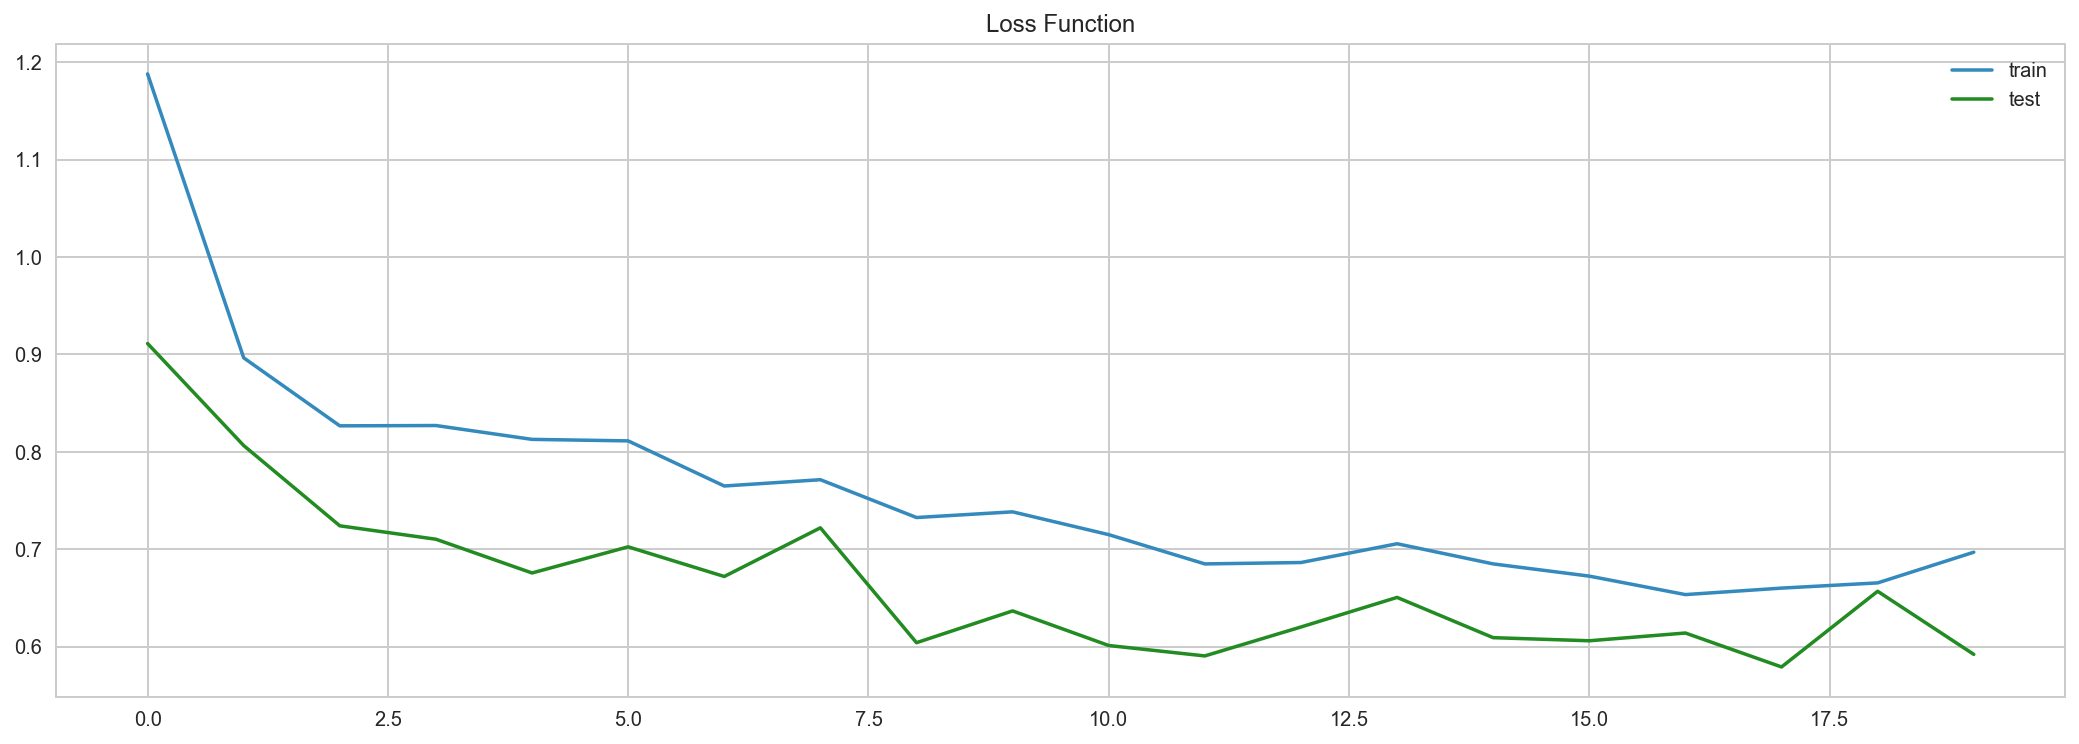

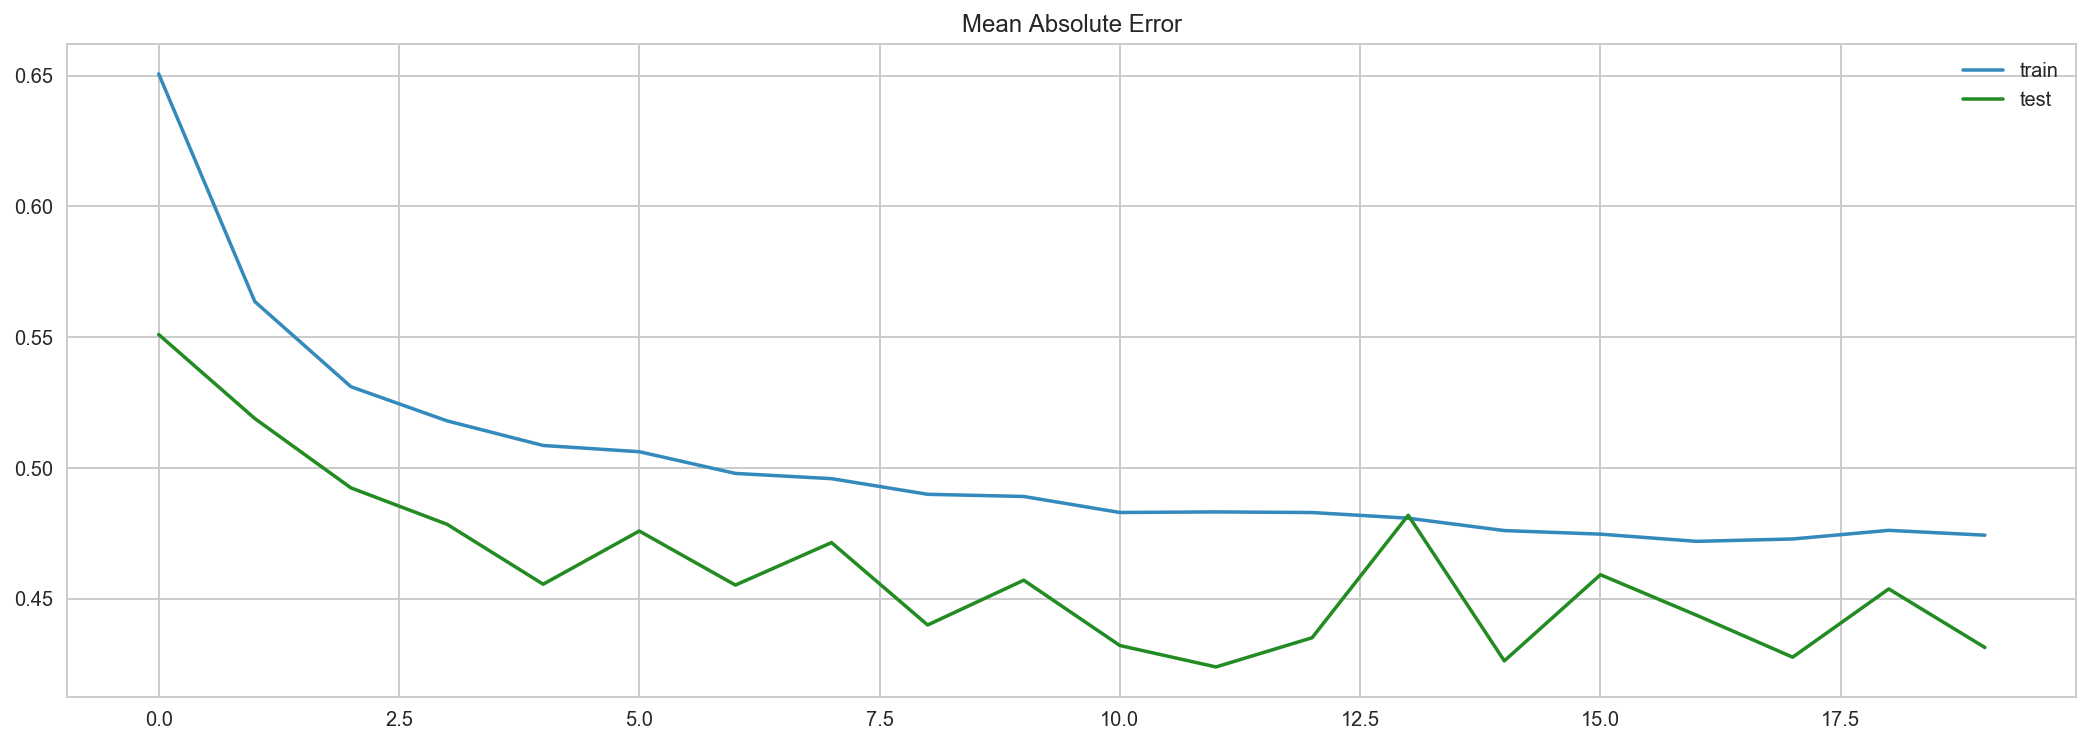

In [282]:
hide_code
loss_plot(cnn_cat_history)
mae_plot(cnn_cat_history)

In [283]:
hide_code
y_train_cat_cnn = cnn_cat_model.predict(X_train_cat.reshape(16719, 44, 1))
y_test_cat_cnn = cnn_cat_model.predict(X_test_cat.reshape(4180, 44, 1))

scores('CNN Model; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_cnn, y_test_cat_cnn)

_______________________________________
CNN Model; Numeric and Categorical Features
_______________________________________
EV score. Train:  0.714647339766
EV score. Test:  0.704040359343
---------
R2 score. Train:  0.714599391759
R2 score. Test:  0.7040372912
---------
MSE score. Train:  0.51902371257
MSE score. Test:  0.592192934027
---------
MAE score. Train:  0.409135780867
MAE score. Test:  0.431381003574
---------
MdAE score. Train:  0.213058656587
MdAE score. Test:  0.220337065038


In [284]:
hide_code
cnn_cat_model.save('cnn_cat_model_p6_v1.h5')

In [285]:
hide_code
def cnn_cat_enc_model():
    model = Sequential()
        
    model.add(Conv1D(159, 5, padding='valid', activation='relu', input_shape=(636, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(318, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(636, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_cat_enc_model = cnn_cat_enc_model()
cnn_cat_enc_history = \
cnn_cat_enc_model.fit(X_train_cat_enc.reshape(16719, 636, 1), y_train_cat_enc, 
                      epochs=10, batch_size=128, verbose=2,
                      validation_data=(X_test_cat_enc.reshape(4180, 636, 1), y_test_cat_enc))

Train on 16719 samples, validate on 4180 samples
Epoch 1/10
537s - loss: 2.5152 - mean_absolute_error: 0.7677 - val_loss: 0.8782 - val_mean_absolute_error: 0.5401
Epoch 2/10
626s - loss: 0.8901 - mean_absolute_error: 0.5504 - val_loss: 0.7429 - val_mean_absolute_error: 0.4744
Epoch 3/10
679s - loss: 0.8055 - mean_absolute_error: 0.5111 - val_loss: 0.8146 - val_mean_absolute_error: 0.5195
Epoch 4/10
567s - loss: 0.7682 - mean_absolute_error: 0.4994 - val_loss: 0.7293 - val_mean_absolute_error: 0.4822
Epoch 5/10
485s - loss: 0.7329 - mean_absolute_error: 0.4873 - val_loss: 0.6471 - val_mean_absolute_error: 0.4582
Epoch 6/10
531s - loss: 0.7259 - mean_absolute_error: 0.4829 - val_loss: 0.6373 - val_mean_absolute_error: 0.4529
Epoch 7/10
431s - loss: 0.6606 - mean_absolute_error: 0.4751 - val_loss: 0.6068 - val_mean_absolute_error: 0.4487
Epoch 8/10
430s - loss: 0.6791 - mean_absolute_error: 0.4753 - val_loss: 0.6498 - val_mean_absolute_error: 0.4571
Epoch 9/10
439s - loss: 0.6463 - mean_a

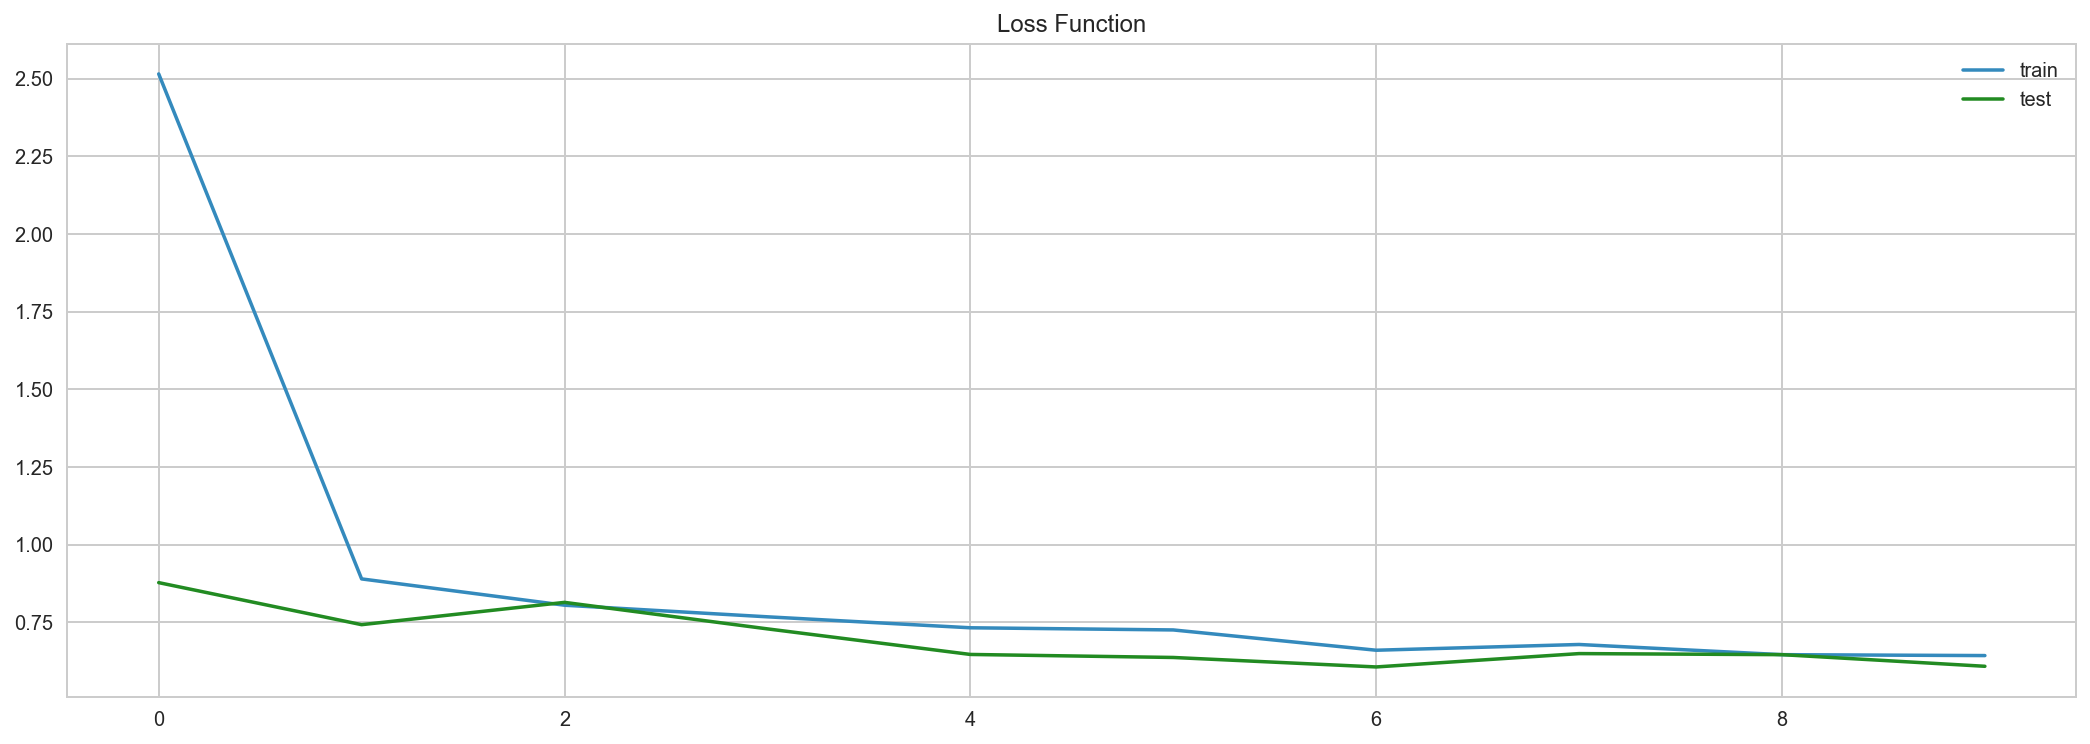

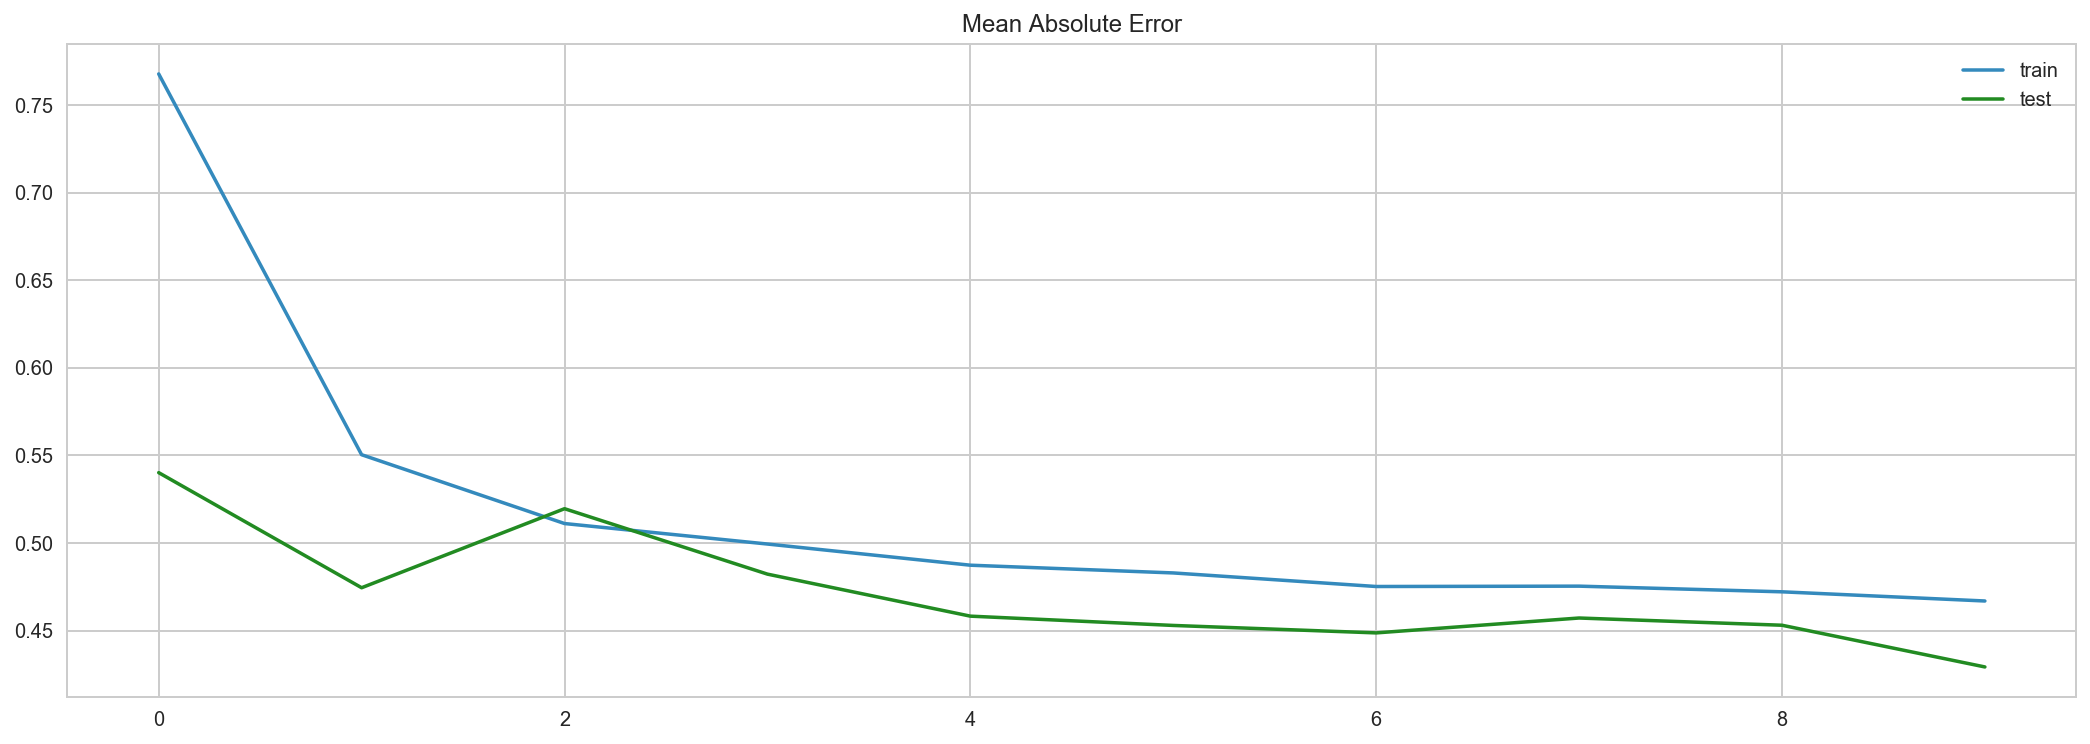

In [286]:
hide_code
loss_plot(cnn_cat_enc_history)
mae_plot(cnn_cat_enc_history)

In [287]:
hide_code
y_train_cat_enc_cnn = cnn_cat_enc_model.predict(X_train_cat_enc.reshape(16719, 636, 1))
y_test_cat_enc_cnn = cnn_cat_enc_model.predict(X_test_cat_enc.reshape(4180, 636, 1))

scores('CNN Model; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_cnn, y_test_cat_enc_cnn)

_______________________________________
CNN Model; Numeric and Encoded Categorical Features
_______________________________________
EV score. Train:  0.700556070004
EV score. Test:  0.695800815209
---------
R2 score. Train:  0.700064018193
R2 score. Test:  0.695661554152
---------
MSE score. Train:  0.545457445834
MSE score. Test:  0.608951978831
---------
MAE score. Train:  0.407704840089
MAE score. Test:  0.429213084878
---------
MdAE score. Train:  0.19749542483
MdAE score. Test:  0.210797543891


In [288]:
hide_code
cnn_cat_enc_model.save('cnn_cat_enc_model_p6_v1.h5')

#### RNN

In [381]:
hide_code
def rnn_model():
    model = Sequential()
    
    model.add(LSTM(144, return_sequences=True, input_shape=(1, 36)))
    model.add(LSTM(576, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_model = rnn_model()
rnn_history = rnn_model.fit(X_train.reshape(16719, 1, 36), y_train.reshape(16719), 
                            epochs=5, verbose=2, 
                            validation_data=(X_test.reshape(4180, 1, 36), y_test.reshape(4180)))

Train on 16719 samples, validate on 4180 samples
Epoch 1/5
51s - loss: 0.8125 - mean_absolute_error: 0.5023 - val_loss: 0.7703 - val_mean_absolute_error: 0.4895
Epoch 2/5
42s - loss: 0.6912 - mean_absolute_error: 0.4630 - val_loss: 0.6607 - val_mean_absolute_error: 0.4560
Epoch 3/5
44s - loss: 0.6497 - mean_absolute_error: 0.4497 - val_loss: 0.6321 - val_mean_absolute_error: 0.4512
Epoch 4/5
42s - loss: 0.6225 - mean_absolute_error: 0.4465 - val_loss: 0.6186 - val_mean_absolute_error: 0.4464
Epoch 5/5
41s - loss: 0.5974 - mean_absolute_error: 0.4393 - val_loss: 0.6614 - val_mean_absolute_error: 0.4429


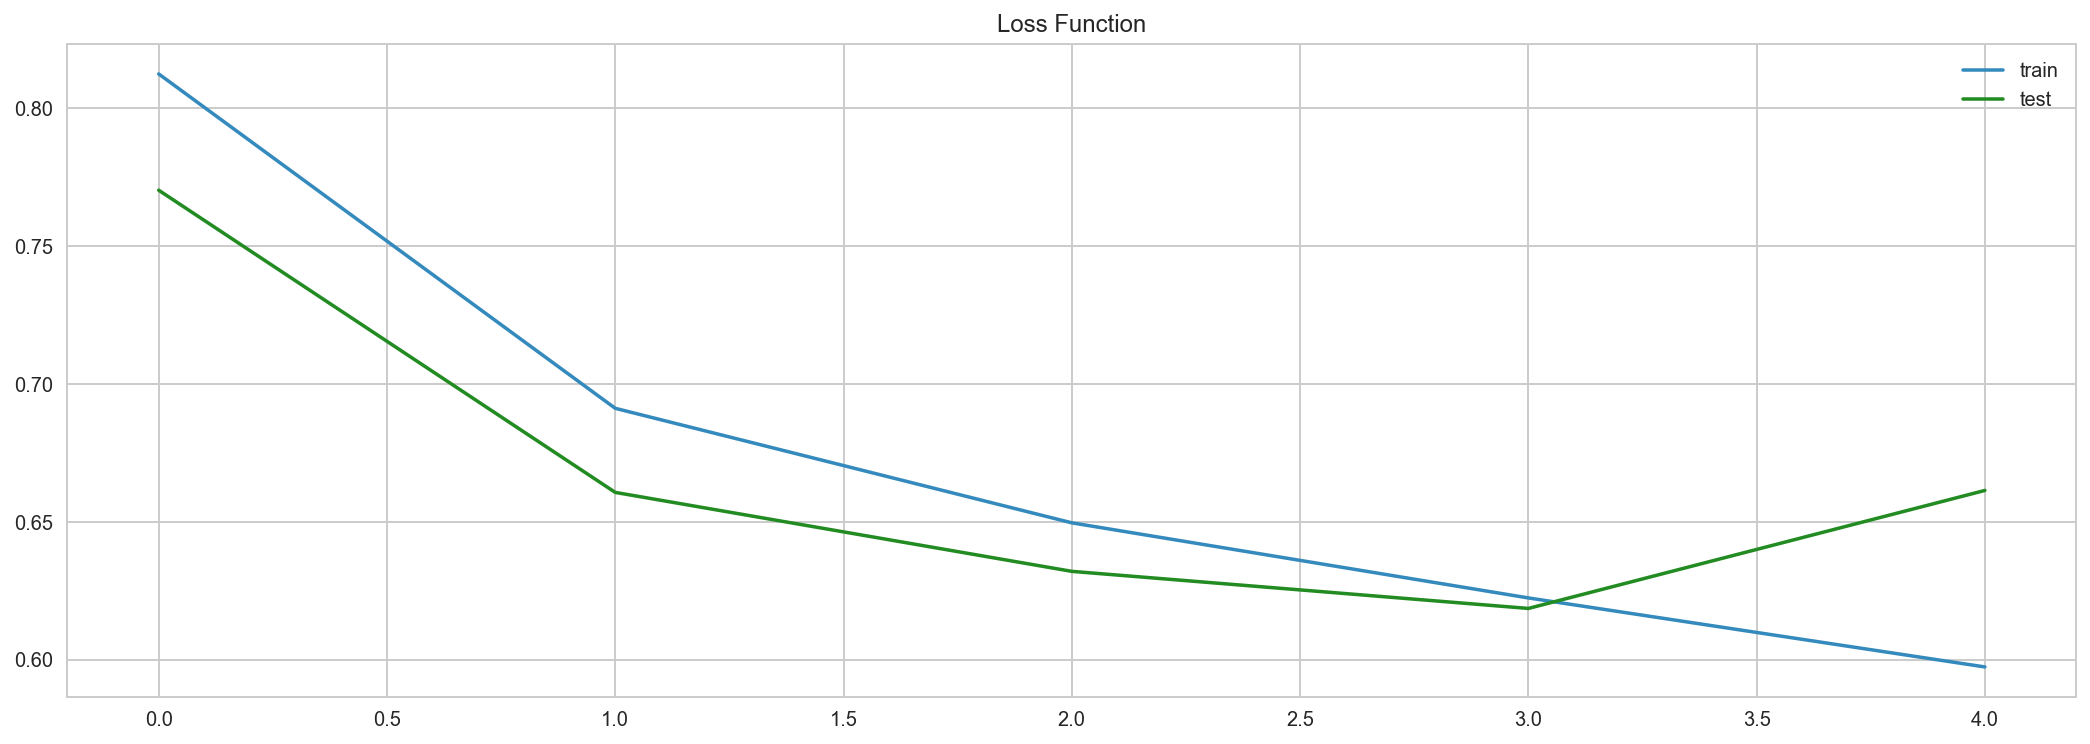

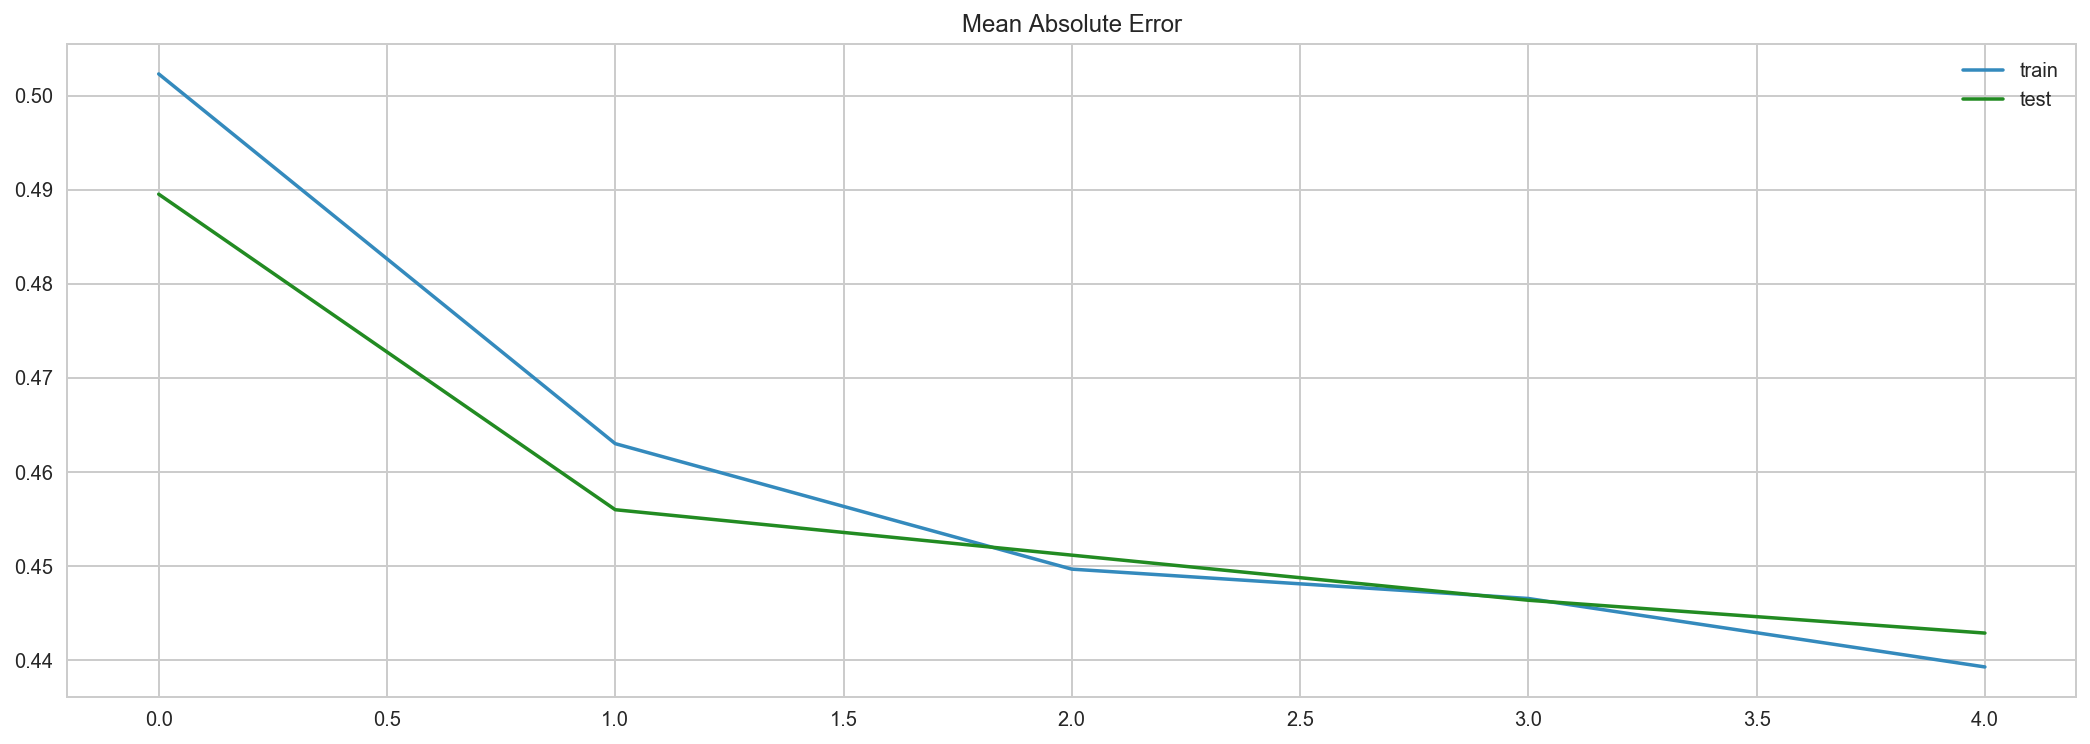

In [382]:
hide_code
loss_plot(rnn_history)
mae_plot(rnn_history)

In [383]:
hide_code
y_train_rnn = rnn_model.predict(X_train.reshape(16719, 1, 36))
y_test_rnn = rnn_model.predict(X_test.reshape(4180, 1, 36))

scores('RNN Model; Numeric Features', y_train, y_test, y_train_rnn, y_test_rnn)

_______________________________________
RNN Model; Numeric Features
_______________________________________
EV score. Train:  0.669729907267
EV score. Test:  0.672271871297
---------
R2 score. Train:  0.665829120884
R2 score. Test:  0.669427337341
---------
MSE score. Train:  0.607716330321
MSE score. Test:  0.661444125184
---------
MAE score. Train:  0.43497858127
MAE score. Test:  0.442872058242
---------
MdAE score. Train:  0.221520338919
MdAE score. Test:  0.219440122743


In [384]:
hide_code
rnn_model.save('rnn_model_p6_v1.h5')

In [385]:
hide_code
def rnn_cat_model():
    model = Sequential()
    
    model.add(LSTM(156, return_sequences=True, input_shape=(1, 44)))
    model.add(LSTM(624, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_model = rnn_cat_model()
rnn_cat_history = rnn_cat_model.fit(X_train_cat.reshape(16719, 1, 44), y_train_cat.reshape(16719), 
                                    epochs=10, verbose=2, 
                                    validation_data=(X_test_cat.reshape(4180, 1, 44), y_test_cat.reshape(4180)))

Train on 16719 samples, validate on 4180 samples
Epoch 1/10
57s - loss: 0.8133 - mean_absolute_error: 0.5039 - val_loss: 0.7067 - val_mean_absolute_error: 0.4581
Epoch 2/10
52s - loss: 0.6861 - mean_absolute_error: 0.4627 - val_loss: 0.6361 - val_mean_absolute_error: 0.4640
Epoch 3/10
53s - loss: 0.6455 - mean_absolute_error: 0.4520 - val_loss: 0.6352 - val_mean_absolute_error: 0.4496
Epoch 4/10
56s - loss: 0.6176 - mean_absolute_error: 0.4459 - val_loss: 0.6760 - val_mean_absolute_error: 0.4565
Epoch 5/10
51s - loss: 0.5996 - mean_absolute_error: 0.4371 - val_loss: 0.5998 - val_mean_absolute_error: 0.4278
Epoch 6/10
55s - loss: 0.5949 - mean_absolute_error: 0.4338 - val_loss: 0.6363 - val_mean_absolute_error: 0.4334
Epoch 7/10
54s - loss: 0.5882 - mean_absolute_error: 0.4287 - val_loss: 0.6079 - val_mean_absolute_error: 0.4278
Epoch 8/10
49s - loss: 0.5738 - mean_absolute_error: 0.4271 - val_loss: 0.6172 - val_mean_absolute_error: 0.4396
Epoch 9/10
50s - loss: 0.5689 - mean_absolute_e

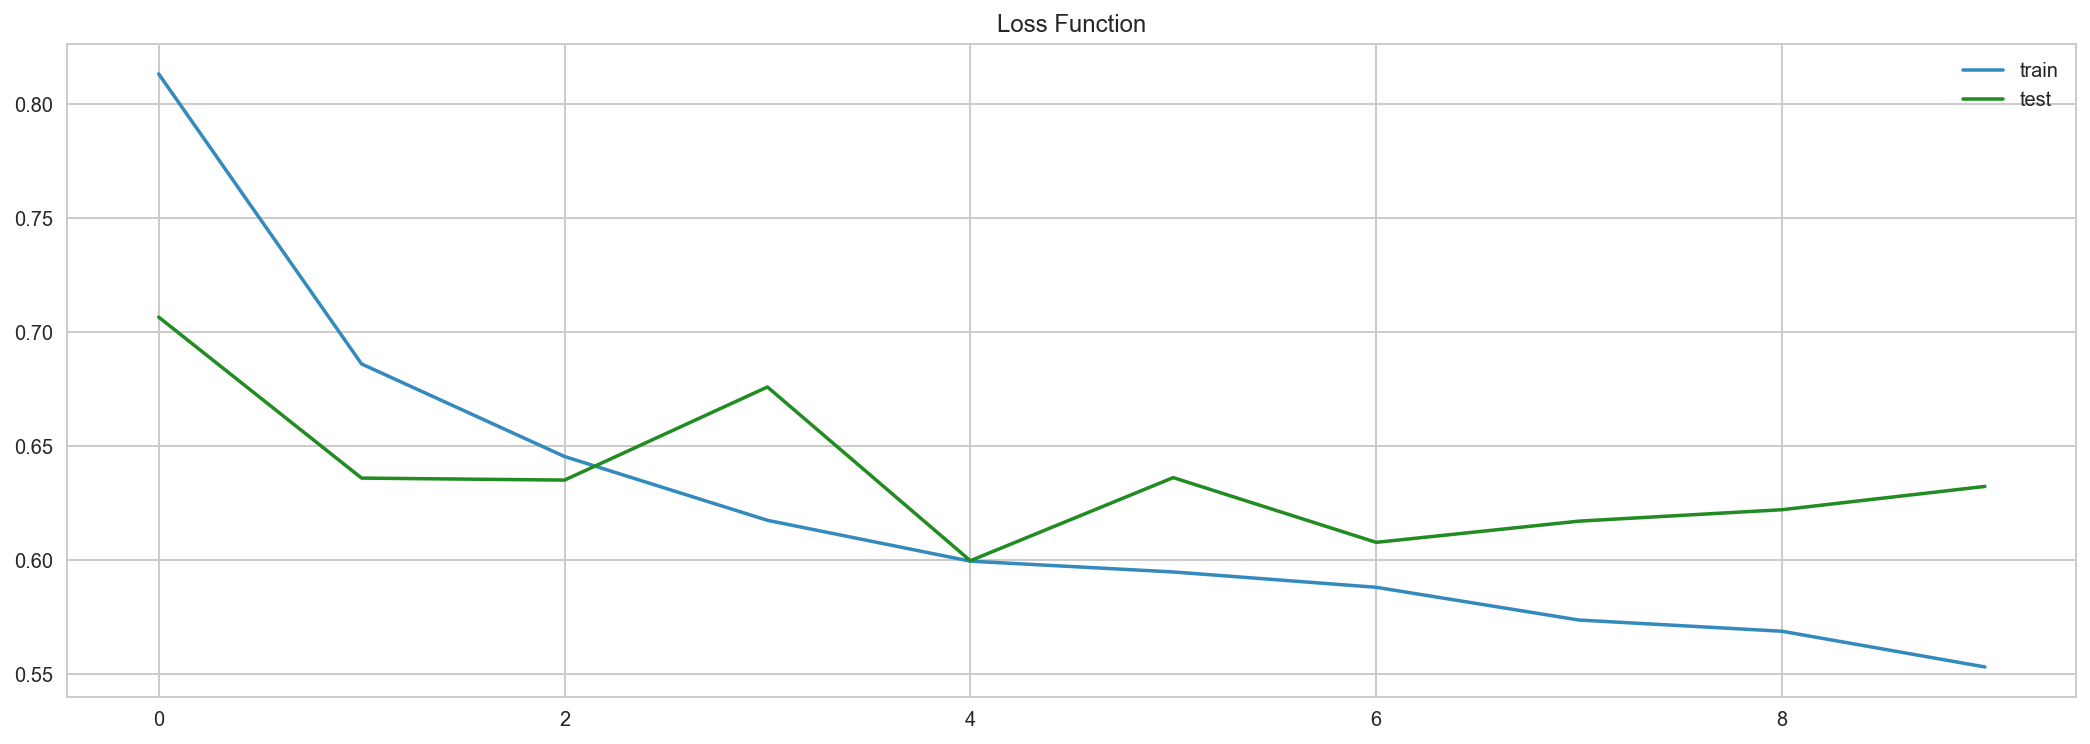

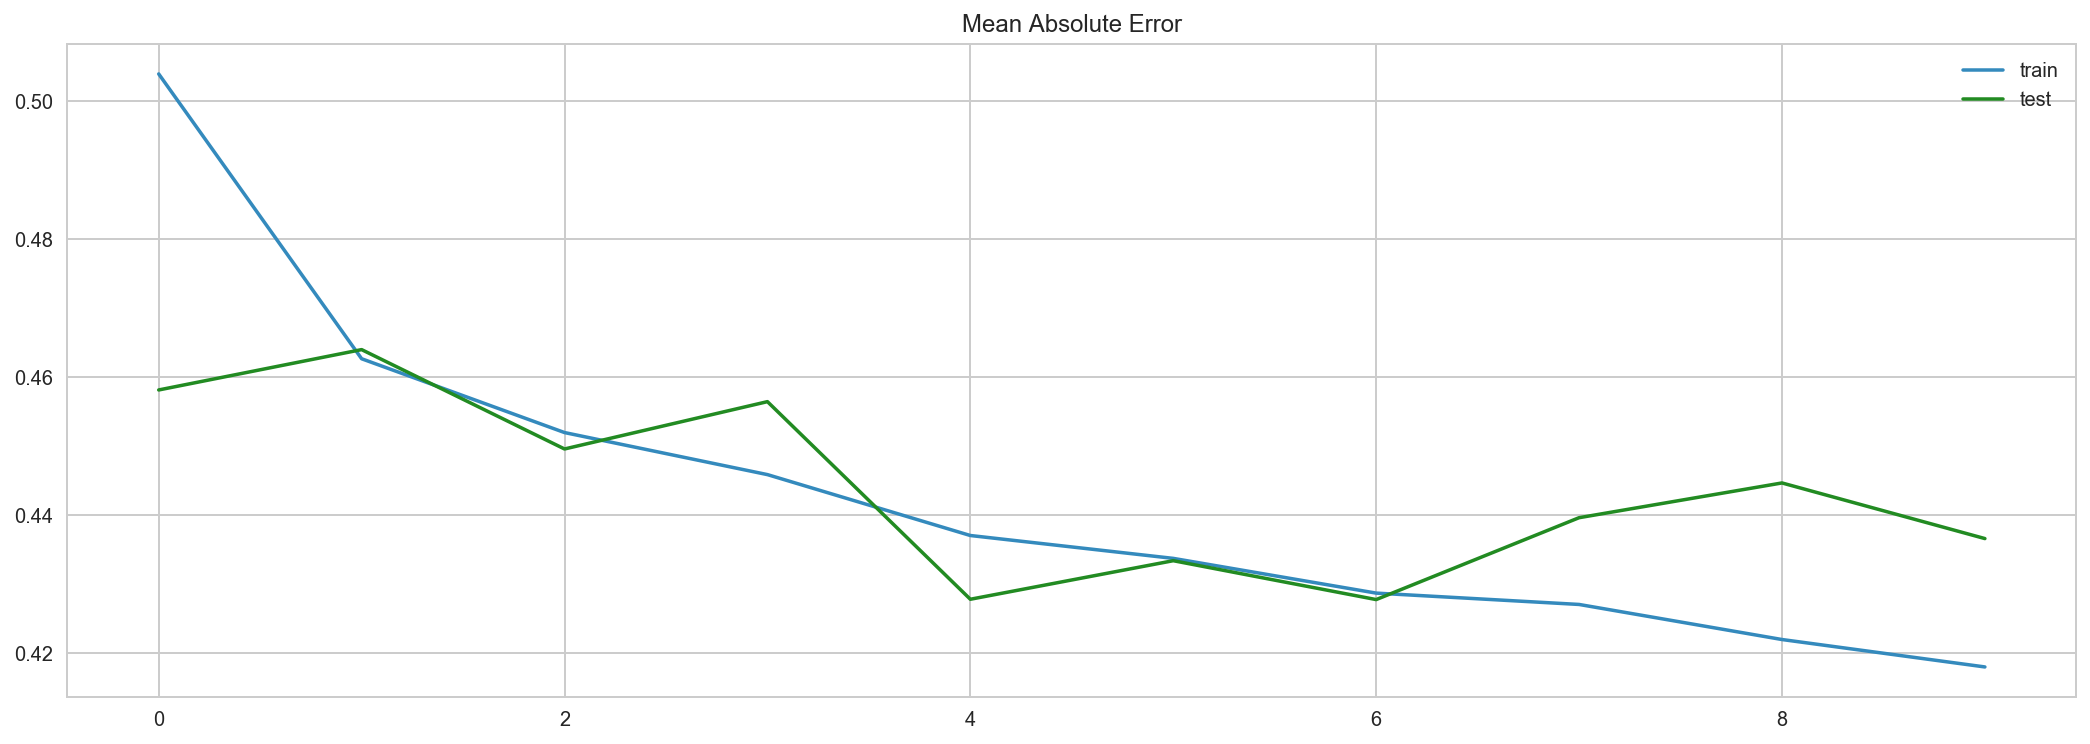

In [386]:
hide_code
loss_plot(rnn_cat_history)
mae_plot(rnn_cat_history)

In [388]:
hide_code
y_train_cat_rnn = rnn_cat_model.predict(X_train_cat.reshape(16719, 1, 44))
y_test_cat_rnn = rnn_cat_model.predict(X_test_cat.reshape(4180, 1, 44))

scores('RNN Model; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_rnn, y_test_cat_rnn)

_______________________________________
RNN Model; Numeric and Categorical Features
_______________________________________
EV score. Train:  0.711654239889
EV score. Test:  0.685670045276
---------
R2 score. Train:  0.708773497946
R2 score. Test:  0.68393091233
---------
MSE score. Train:  0.529618563978
MSE score. Test:  0.632423865633
---------
MAE score. Train:  0.420123919032
MAE score. Test:  0.436622855194
---------
MdAE score. Train:  0.224674212926
MdAE score. Test:  0.233825823506


In [389]:
hide_code
rnn_cat_model.save('rnn_cat_model_p6_v1.h5')

In [390]:
hide_code
def rnn_cat_enc_model():
    model = Sequential()
    
    model.add(LSTM(159, return_sequences=True, input_shape=(1, 636)))
    model.add(LSTM(636, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_enc_model = rnn_cat_enc_model()
rnn_cat_enc_history = \
rnn_cat_enc_model.fit(X_train_cat_enc.reshape(16719, 1, 636), y_train_cat_enc.reshape(16719), 
                      epochs=10, verbose=2, 
                      validation_data=(X_test_cat_enc.reshape(4180, 1, 636), y_test_cat_enc.reshape(4180)))

Train on 16719 samples, validate on 4180 samples
Epoch 1/10
74s - loss: 0.7850 - mean_absolute_error: 0.4825 - val_loss: 0.7015 - val_mean_absolute_error: 0.4712
Epoch 2/10
58s - loss: 0.6524 - mean_absolute_error: 0.4411 - val_loss: 0.6120 - val_mean_absolute_error: 0.4455
Epoch 3/10
65s - loss: 0.6175 - mean_absolute_error: 0.4315 - val_loss: 0.6699 - val_mean_absolute_error: 0.4564
Epoch 4/10
62s - loss: 0.5853 - mean_absolute_error: 0.4251 - val_loss: 0.6142 - val_mean_absolute_error: 0.4221
Epoch 5/10
58s - loss: 0.5820 - mean_absolute_error: 0.4200 - val_loss: 0.6252 - val_mean_absolute_error: 0.4423
Epoch 6/10
56s - loss: 0.5698 - mean_absolute_error: 0.4140 - val_loss: 0.6477 - val_mean_absolute_error: 0.4242
Epoch 7/10
60s - loss: 0.5567 - mean_absolute_error: 0.4124 - val_loss: 0.6214 - val_mean_absolute_error: 0.4154
Epoch 8/10
57s - loss: 0.5393 - mean_absolute_error: 0.4085 - val_loss: 0.6161 - val_mean_absolute_error: 0.4181
Epoch 9/10
58s - loss: 0.5418 - mean_absolute_e

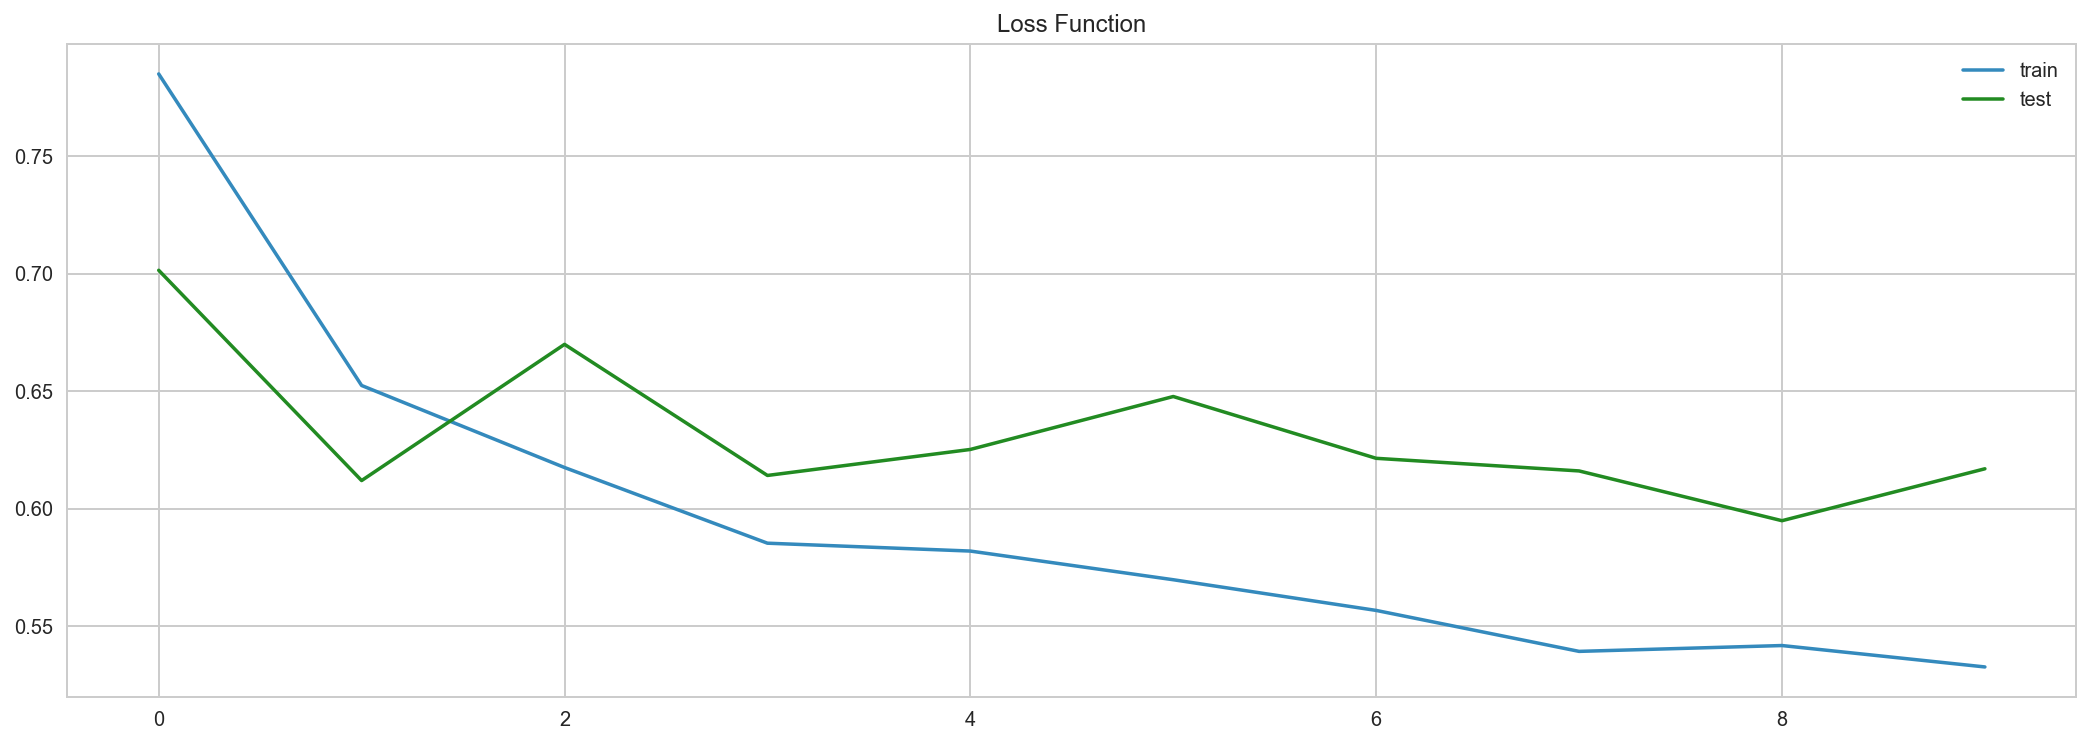

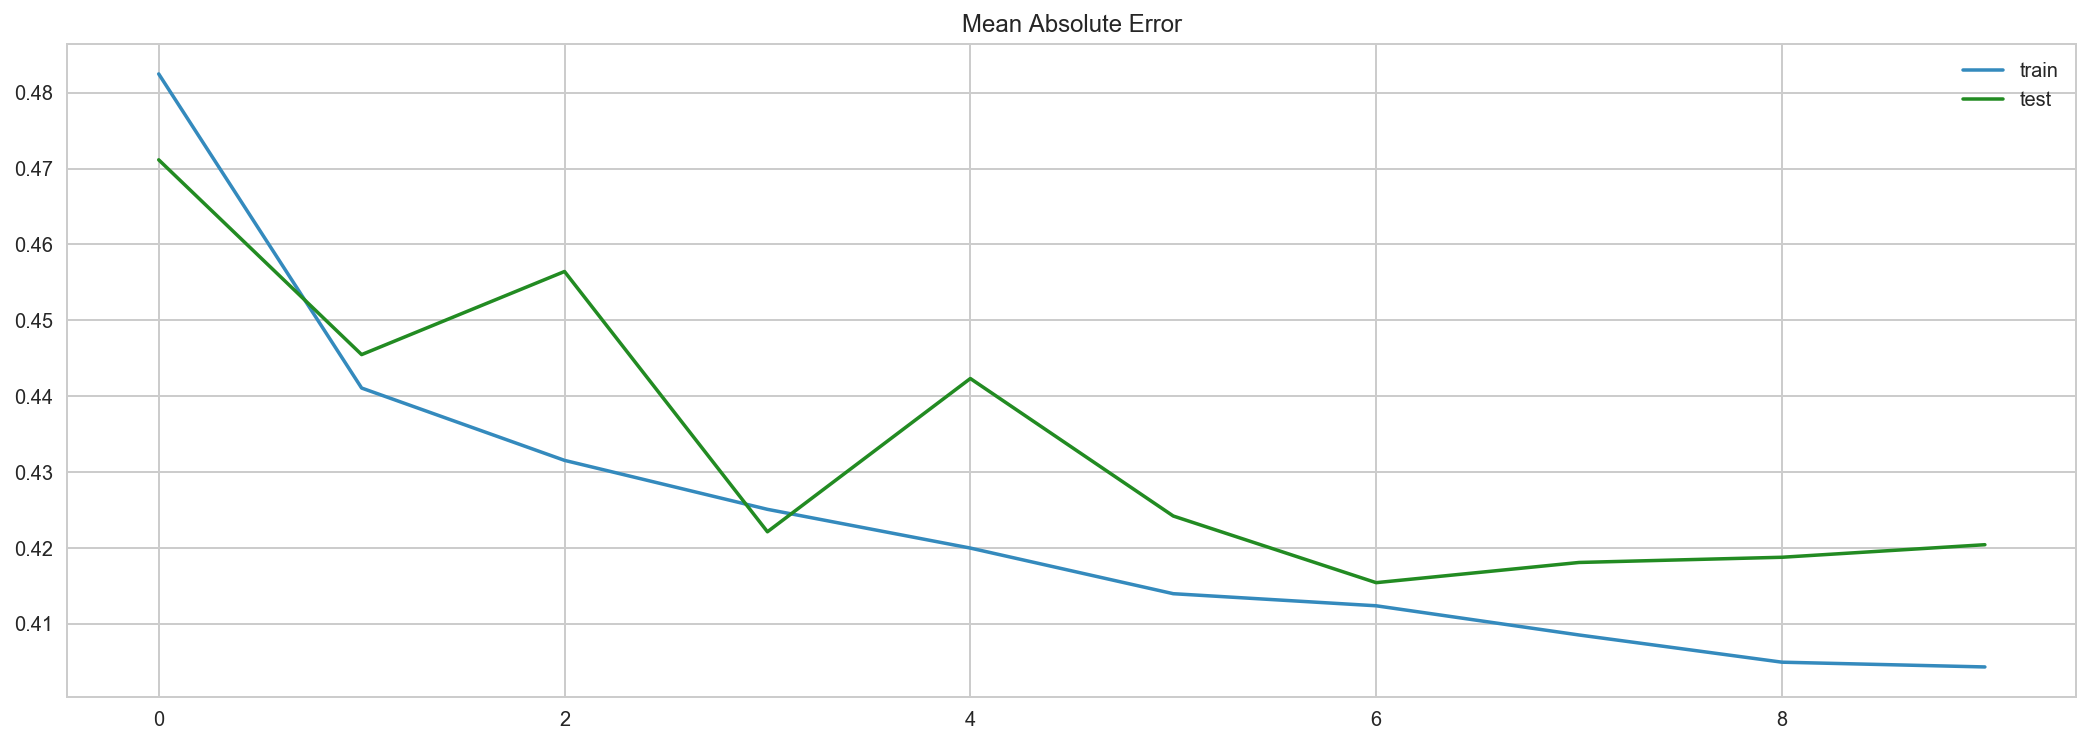

In [391]:
hide_code
loss_plot(rnn_cat_enc_history)
mae_plot(rnn_cat_enc_history)

In [394]:
hide_code
y_train_cat_enc_rnn = rnn_cat_enc_model.predict(X_train_cat_enc.reshape(16719, 1, 636))
y_test_cat_enc_rnn = rnn_cat_enc_model.predict(X_test_cat_enc.reshape(4180, 1, 636))

scores('RNN Model; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_rnn, y_test_cat_enc_rnn)

_______________________________________
RNN Model; Numeric and Encoded Categorical Features
_______________________________________
EV score. Train:  0.735604398898
EV score. Test:  0.692179528
---------
R2 score. Train:  0.735461066399
R2 score. Test:  0.691642716237
---------
MSE score. Train:  0.481085097481
MSE score. Test:  0.616993287231
---------
MAE score. Train:  0.386847223039
MAE score. Test:  0.420431613549
---------
MdAE score. Train:  0.190230529196
MdAE score. Test:  0.206250312699


In [395]:
hide_code
rnn_cat_enc_model.save('rnn_cat_enc_model_p6_v1.h5')

#### Display Predictions

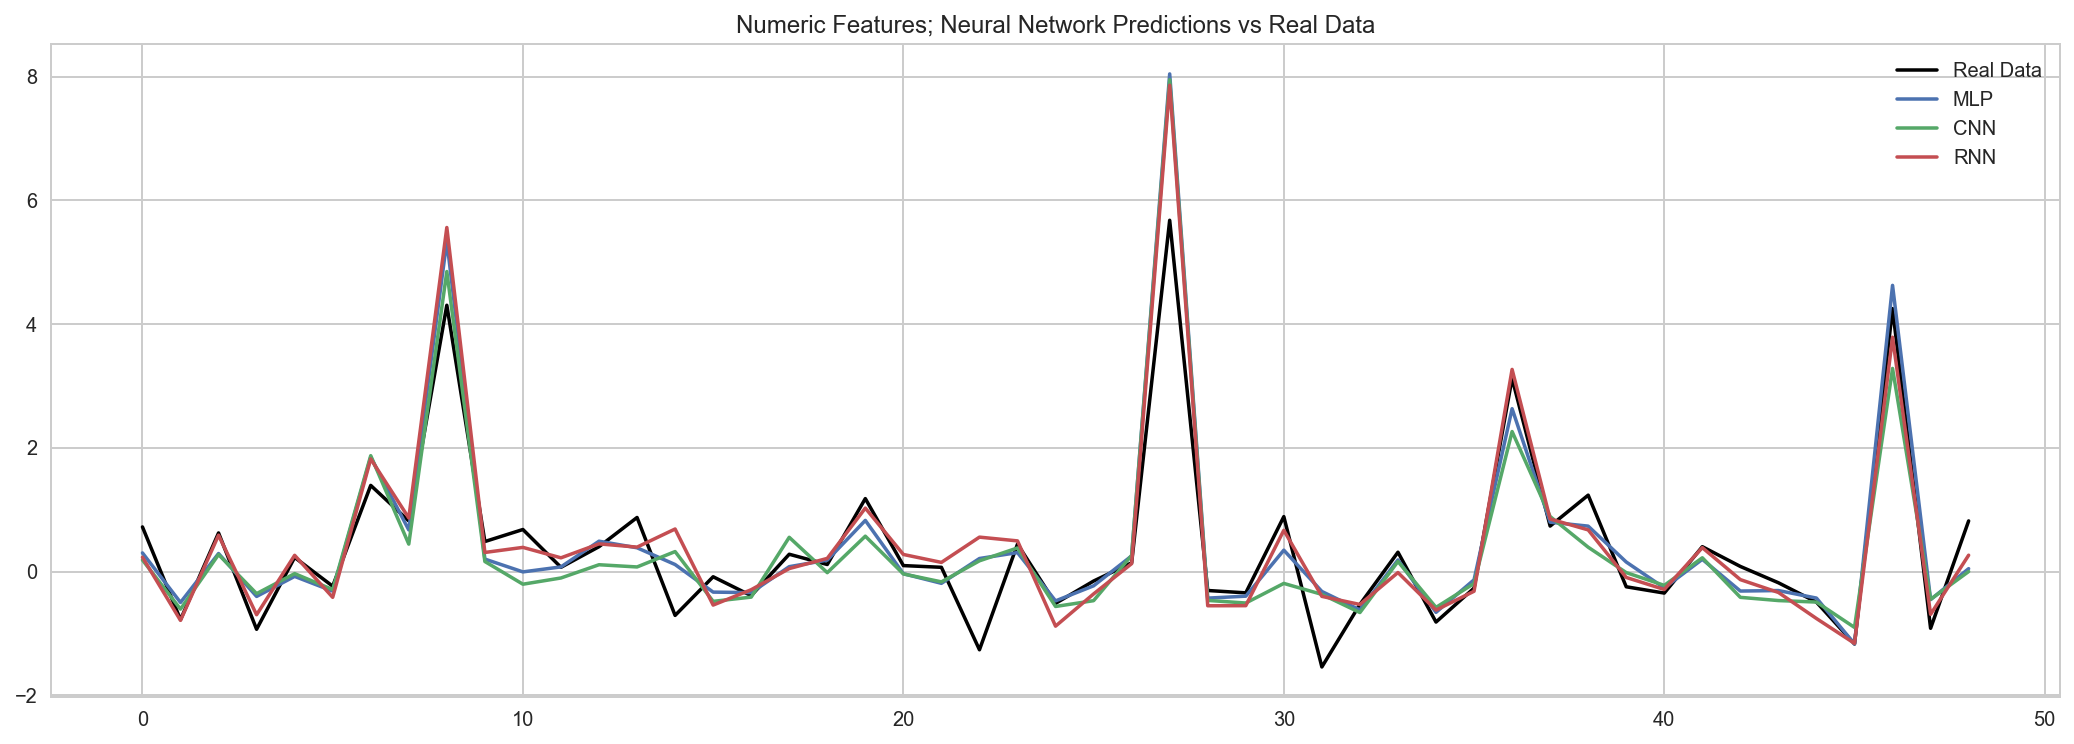

In [396]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp[1:50], label='MLP')
plt.plot(y_test_cnn[1:50], label='CNN')
plt.plot(y_test_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Neural Network Predictions vs Real Data");

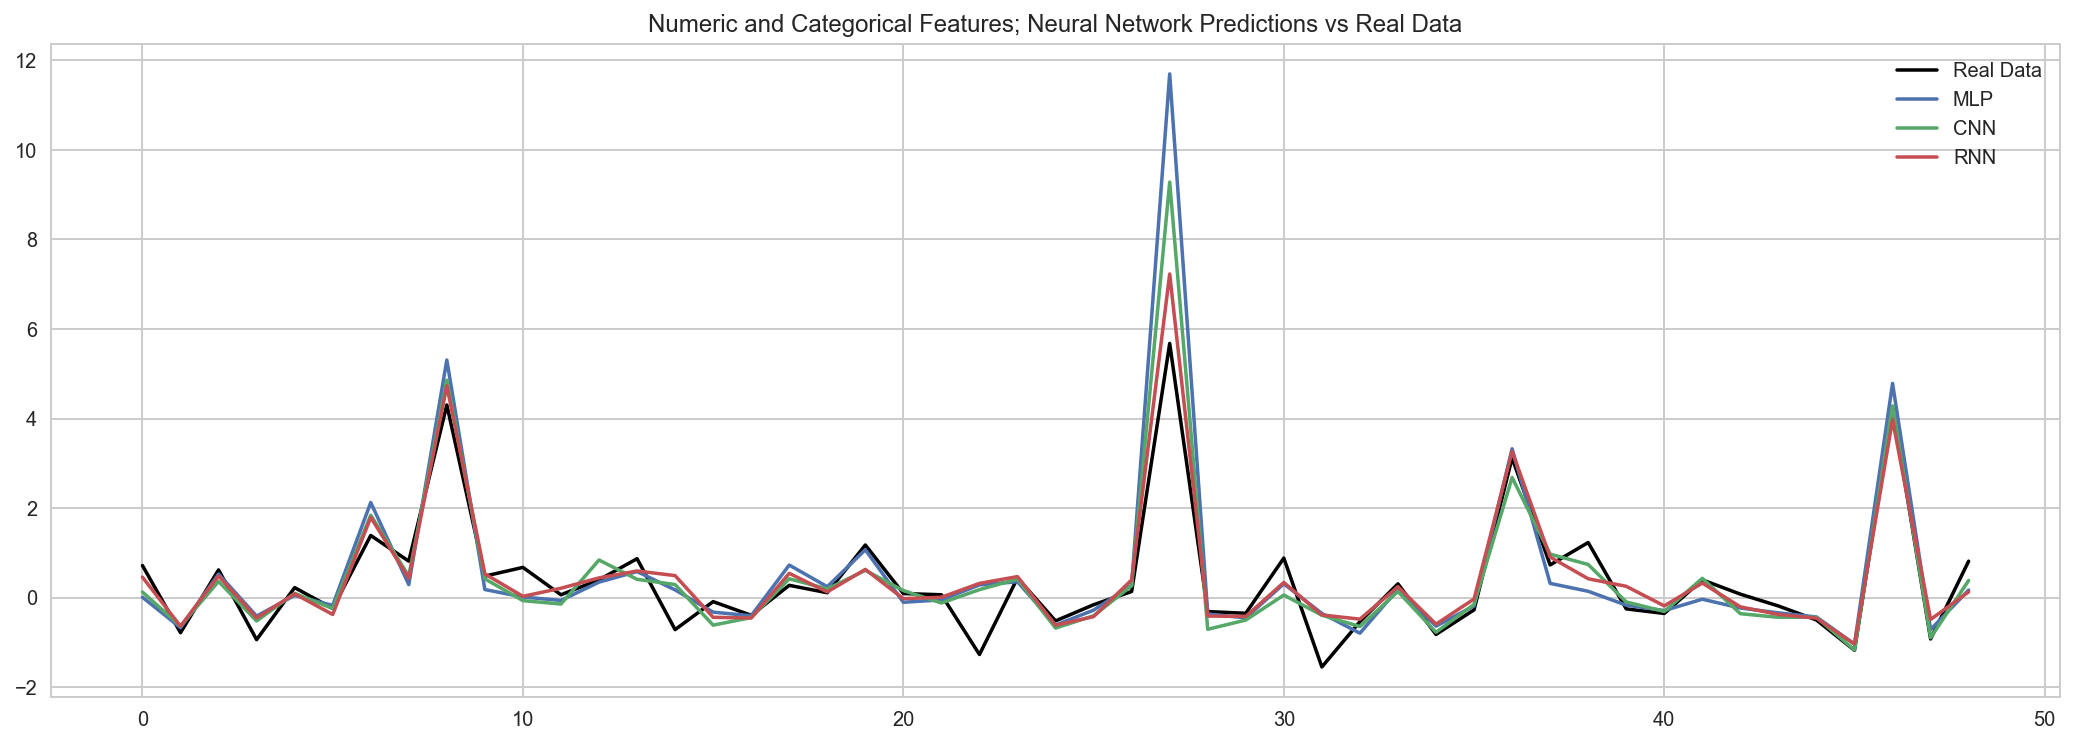

In [397]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_mlp[1:50], label='MLP')
plt.plot(y_test_cat_cnn[1:50], label='CNN')
plt.plot(y_test_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Neural Network Predictions vs Real Data");

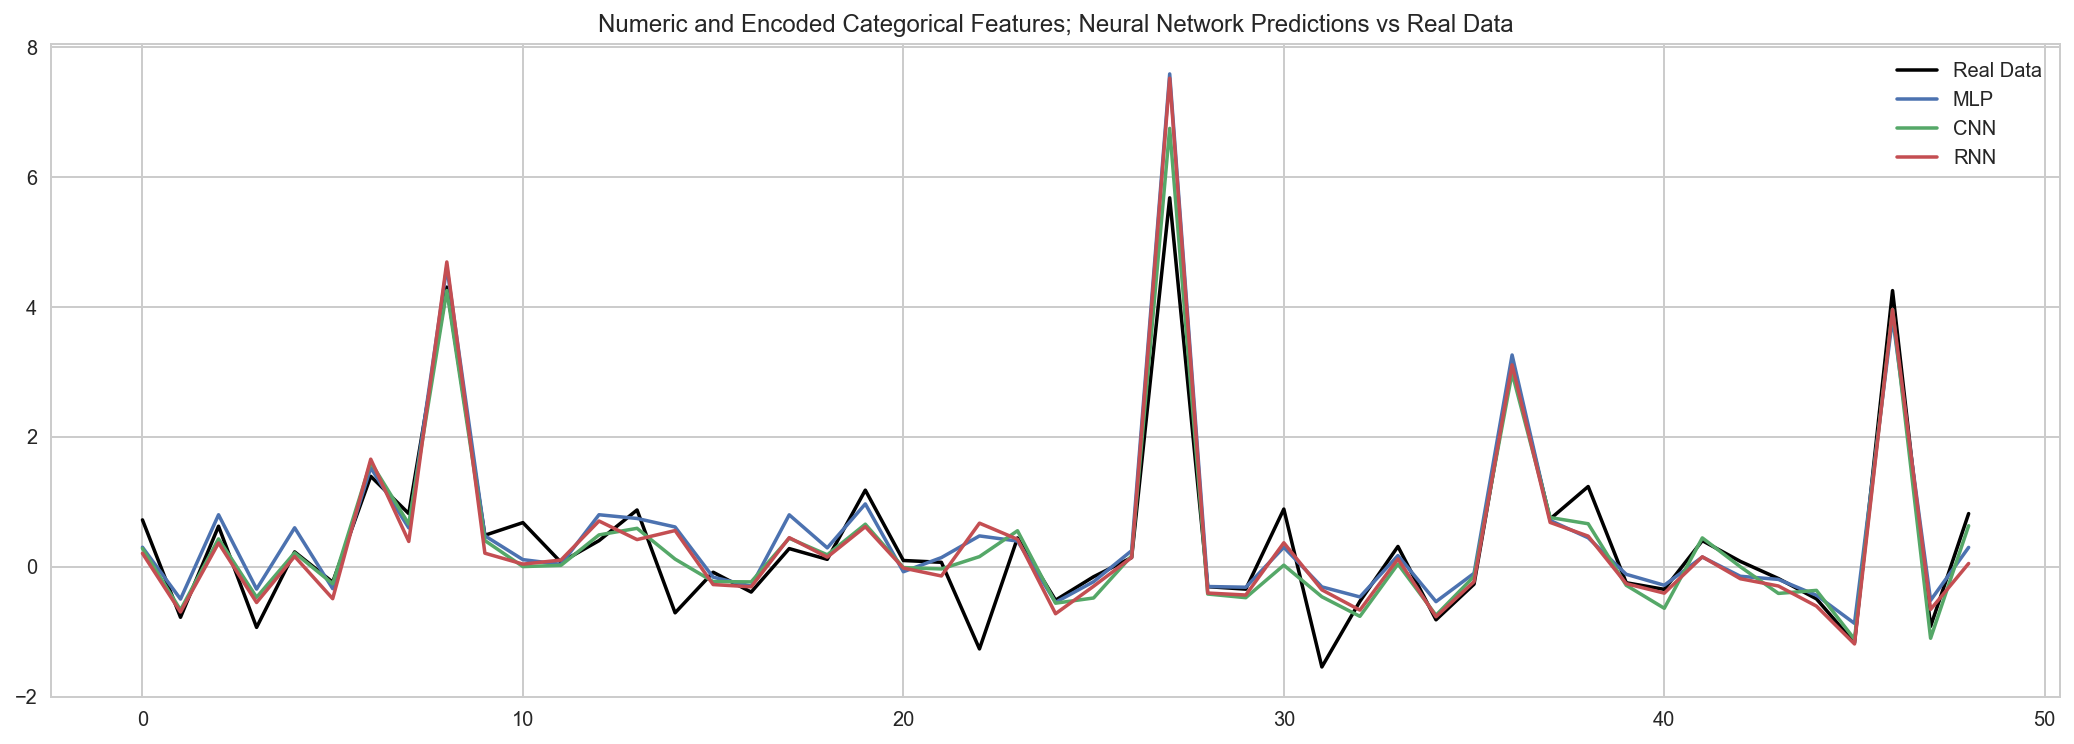

In [398]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(y_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(y_test_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Neural Network Predictions vs Real Data");

---
## $\mathfrak {\color{#228B22} {7. \  Evaluation \ Metrics }}$
- explained variance regression score
- coefficient of determination
- mean squared error
- mean absolute error
- median absolute error

In [130]:
hide_code
target_scale = RobustScaler()
s_target_train = target_scale.fit_transform(target_train.reshape(-1,1))
##############################################################################
feature_scale = RobustScaler()
s_features_train = feature_scale.fit_transform(features_train)
s_features_test = feature_scale.transform(features_test)
##############################################################################
feature_cat_scale = RobustScaler()
s_features_train_cat = feature_cat_scale.fit_transform(features_train_cat)
s_features_test_cat = feature_cat_scale.transform(features_test_cat)
##############################################################################
feature_cat_enc_scale = RobustScaler()
s_features_train_cat_enc = feature_cat_enc_scale.fit_transform(features_train_cat_enc)
s_features_test_cat_enc = feature_cat_enc_scale.transform(features_test_cat_enc)

### 7.1 Regressors; Scikit-Learn
#### Numeric Features

In [131]:
hide_code
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=324)
gbr.fit(s_features_train, s_target_train)

s_target_train_gbr = gbr.predict(s_features_train)
s_target_test_gbr = gbr.predict(s_features_test)

scores2('Gradient Boosting Regressor', s_target_train, s_target_train_gbr)

_______________________________________
Gradient Boosting Regressor
_______________________________________
EV score: 0.846149874094
---------
R2 score: 0.846149874094
---------
MSE score: 0.283961561351
---------
MAE score: 0.329693064273
---------
MdAE score: 0.178105011628


In [132]:
hide_code
br = BaggingRegressor(n_estimators=252)
br.fit(s_features_train, s_target_train)

s_target_train_br = br.predict(s_features_train)
s_target_test_br = br.predict(s_features_test)

scores2('Bagging Regressor', s_target_train, s_target_train_br)

_______________________________________
Bagging Regressor
_______________________________________
EV score: 0.957632026926
---------
R2 score: 0.957609840834
---------
MSE score: 0.0782396225666
---------
MAE score: 0.144916382622
---------
MdAE score: 0.0627391246137


In [168]:
hide_code
s_target_train_mlpr = mlpr.predict(s_features_train)
s_target_test_mlpr = mlpr.predict(s_features_test)

scores2('MLP Regressor', s_target_train, s_target_train_mlpr)

_______________________________________
MLP Regressor
_______________________________________
EV score: 0.697807563299
---------
R2 score: 0.697709597079
---------
MSE score: 0.557938151103
---------
MAE score: 0.428168725246
---------
MdAE score: 0.235760748061


#### Numeric and Categorical Features

In [139]:
hide_code
gbr_cat = GradientBoostingRegressor(max_depth=3, n_estimators=396)
gbr_cat.fit(s_features_train_cat, s_target_train)

s_target_train_cat_gbr = gbr_cat.predict(s_features_train_cat)
s_target_test_cat_gbr = gbr_cat.predict(s_features_test_cat)

scores2('Gradient Boosting Regressor', s_target_train, s_target_train_cat_gbr)

_______________________________________
Gradient Boosting Regressor
_______________________________________
EV score: 0.813227343634
---------
R2 score: 0.813227343634
---------
MSE score: 0.344726757987
---------
MAE score: 0.357167721423
---------
MdAE score: 0.190744564286


In [140]:
hide_code
br_cat = BaggingRegressor(n_estimators=220)
br_cat.fit(s_features_train_cat, s_target_train)

s_target_train_cat_br = br_cat.predict(s_features_train_cat)
s_target_test_cat_br = br_cat.predict(s_features_test_cat)

scores2('Bagging Regressor', s_target_train, s_target_train_cat_br)

_______________________________________
Bagging Regressor
_______________________________________
EV score: 0.95823047958
---------
R2 score: 0.958209507627
---------
MSE score: 0.0771328160699
---------
MAE score: 0.144805121735
---------
MdAE score: 0.0631686468172


In [169]:
hide_code
s_target_train_cat_mlpr = mlpr_cat.predict(s_features_train_cat)
s_target_test_cat_mlpr = mlpr_cat.predict(s_features_test_cat)

scores2('MLP Regressor', s_target_train, s_target_train_cat_mlpr)

_______________________________________
MLP Regressor
_______________________________________
EV score: 0.715135612803
---------
R2 score: 0.715044392279
---------
MSE score: 0.52594327634
---------
MAE score: 0.417225402183
---------
MdAE score: 0.227061974835


#### Numeric and Encoded Categorical Features

In [151]:
hide_code
gbr_cat_enc = GradientBoostingRegressor(max_depth=3, n_estimators=159)
gbr_cat_enc.fit(s_features_train_cat_enc, s_target_train)

s_target_train_cat_enc_gbr = gbr_cat_enc.predict(s_features_train_cat_enc)
s_target_test_cat_enc_gbr = gbr_cat_enc.predict(s_features_test_cat_enc)

scores2('Gradient Boosting Regressor', s_target_train, s_target_train_cat_enc_gbr)

_______________________________________
Gradient Boosting Regressor
_______________________________________
EV score: 0.764000775181
---------
R2 score: 0.764000775181
---------
MSE score: 0.435584358236
---------
MAE score: 0.394758875506
---------
MdAE score: 0.206033263364


In [152]:
hide_code
br_cat_enc = BaggingRegressor(n_estimators=159)
br_cat_enc.fit(s_features_train_cat_enc, s_target_train)

s_target_train_cat_enc_br = br_cat.predict(s_features_train_cat_enc)
s_target_test_cat_enc_br = br_cat.predict(s_features_test_cat_enc)

scores2('Bagging Regressor', s_target_train, s_target_train_cat_enc_br)

_______________________________________
Bagging Regressor
_______________________________________
EV score: 0.922024903304
---------
R2 score: 0.921889292209
---------
MSE score: 0.144169128313
---------
MAE score: 0.200446323213
---------
MdAE score: 0.0923258734307


In [170]:
hide_code
s_target_train_cat_enc_mlpr = mlpr_cat_enc.predict(s_features_train_cat_enc)
s_target_test_cat_enc_mlpr = mlpr_cat_enc.predict(s_features_test_cat_enc)

scores2('MLP Regressor', s_target_train, s_target_train_cat_enc_mlpr)

_______________________________________
MLP Regressor
_______________________________________
EV score: 0.744930111268
---------
R2 score: 0.744842086744
---------
MSE score: 0.470945597298
---------
MAE score: 0.403972135171
---------
MdAE score: 0.220650947817


### 7.2 Neural Networks; Keras
#### Numeric Features

In [399]:
hide_code
s_target_train_mlp = mlp_model.predict(s_features_train)
s_target_test_mlp = mlp_model.predict(s_features_test)

scores2('MLP', s_target_train, s_target_train_mlp)

_______________________________________
MLP
_______________________________________
EV score: 0.731817549774
---------
R2 score: 0.731743956892
---------
MSE score: 0.495120848256
---------
MAE score: 0.401421370799
---------
MdAE score: 0.202039706192


In [400]:
hide_code
s_target_train_cnn = cnn_model.predict(s_features_train.reshape(20899, 36, 1))
s_target_test_cnn = cnn_model.predict(s_features_test.reshape(7662, 36, 1))

scores2('CNN', s_target_train, s_target_train_cnn)

_______________________________________
CNN
_______________________________________
EV score: 0.692535679804
---------
R2 score: 0.690827371994
---------
MSE score: 0.570640691119
---------
MAE score: 0.44327943117
---------
MdAE score: 0.250955498201


In [401]:
hide_code
s_target_train_rnn = rnn_model.predict(s_features_train.reshape(20899, 1, 36))
s_target_test_rnn = rnn_model.predict(s_features_test.reshape(7662, 1, 36))

scores2('RNN', s_target_train, s_target_train_rnn)

_______________________________________
RNN
_______________________________________
EV score: 0.670246679608
---------
R2 score: 0.666662519003
---------
MSE score: 0.615241820592
---------
MAE score: 0.435747576599
---------
MdAE score: 0.220844753131


#### Numeric and Categorical Feature

In [402]:
hide_code
s_target_train_cat_mlp = mlp_cat_model.predict(s_features_train_cat)
s_target_test_cat_mlp = mlp_cat_model.predict(s_features_test_cat)

scores2('MLP', s_target_train, s_target_train_cat_mlp)

_______________________________________
MLP
_______________________________________
EV score: 0.772790167451
---------
R2 score: 0.772238287003
---------
MSE score: 0.420380362108
---------
MAE score: 0.376701321019
---------
MdAE score: 0.194502301107


In [403]:
hide_code
s_target_train_cat_cnn = cnn_cat_model.predict(s_features_train_cat.reshape(20899, 44, 1))
s_target_test_cat_cnn = cnn_cat_model.predict(s_features_test_cat.reshape(7662, 44, 1))

scores2('CNN', s_target_train, s_target_train_cat_cnn)

_______________________________________
CNN
_______________________________________
EV score: 0.712321439286
---------
R2 score: 0.712297048613
---------
MSE score: 0.5310140554
---------
MAE score: 0.412814062514
---------
MdAE score: 0.214541242759


In [404]:
hide_code
s_target_train_cat_rnn = rnn_cat_model.predict(s_features_train_cat.reshape(20899, 1, 44))
s_target_test_cat_rnn = rnn_cat_model.predict(s_features_test_cat.reshape(7662, 1, 44))

scores2('RNN', s_target_train, s_target_train_cat_rnn)

_______________________________________
RNN
_______________________________________
EV score: 0.706113323899
---------
R2 score: 0.703683115425
---------
MSE score: 0.546912813383
---------
MAE score: 0.422101014383
---------
MdAE score: 0.225965861896


#### Numeric and Encoded Categorical Features

In [405]:
hide_code
s_target_train_cat_enc_mlp = mlp_cat_enc_model.predict(s_features_train_cat_enc)
s_target_test_cat_enc_mlp = mlp_cat_enc_model.predict(s_features_test_cat_enc)

scores2('MLP', s_target_train, s_target_train_cat_enc_mlp)

_______________________________________
MLP
_______________________________________
EV score: 0.773513681109
---------
R2 score: 0.769056422277
---------
MSE score: 0.426253137772
---------
MAE score: 0.371899232037
---------
MdAE score: 0.193324280717


In [406]:
hide_code
s_target_train_cat_enc_cnn = cnn_cat_enc_model.predict(s_features_train_cat_enc.reshape(20899, 636, 1))
s_target_test_cat_enc_cnn = cnn_cat_enc_model.predict(s_features_test_cat_enc.reshape(7662, 636, 1))

scores2('CNN', s_target_train, s_target_train_cat_enc_cnn)

_______________________________________
CNN
_______________________________________
EV score: 0.699433627764
---------
R2 score: 0.699004726236
---------
MSE score: 0.555547727986
---------
MAE score: 0.410932823543
---------
MdAE score: 0.19902928313


In [407]:
hide_code
s_target_train_cat_enc_rnn = rnn_cat_enc_model.predict(s_features_train_cat_enc.reshape(20899, 1, 636))
s_target_test_cat_enc_rnn = rnn_cat_enc_model.predict(s_features_test_cat_enc.reshape(7662, 1, 636))

scores2('RNN', s_target_train, s_target_train_cat_enc_rnn)

_______________________________________
RNN
_______________________________________
EV score: 0.726342455409
---------
R2 score: 0.726062896988
---------
MSE score: 0.505606394698
---------
MAE score: 0.393442890848
---------
MdAE score: 0.194415692905


### 7.3 Display All Predictions

In [408]:
hide_code
# Rescale Predictions
target_train_gbr = target_scale.inverse_transform(s_target_train_gbr.reshape(-1,1))
target_test_gbr = target_scale.inverse_transform(s_target_test_gbr.reshape(-1,1))
target_train_br = target_scale.inverse_transform(s_target_train_br.reshape(-1,1))
target_test_br = target_scale.inverse_transform(s_target_test_br.reshape(-1,1))
target_train_mlpr = target_scale.inverse_transform(s_target_train_mlpr.reshape(-1,1))
target_test_mlpr = target_scale.inverse_transform(s_target_test_mlpr.reshape(-1,1))

target_train_mlp = target_scale.inverse_transform(s_target_train_mlp)
target_test_mlp = target_scale.inverse_transform(s_target_test_mlp)
target_train_cnn = target_scale.inverse_transform(s_target_train_cnn)
target_test_cnn = target_scale.inverse_transform(s_target_test_cnn)
target_train_rnn = target_scale.inverse_transform(s_target_train_rnn)
target_test_rnn = target_scale.inverse_transform(s_target_test_rnn)

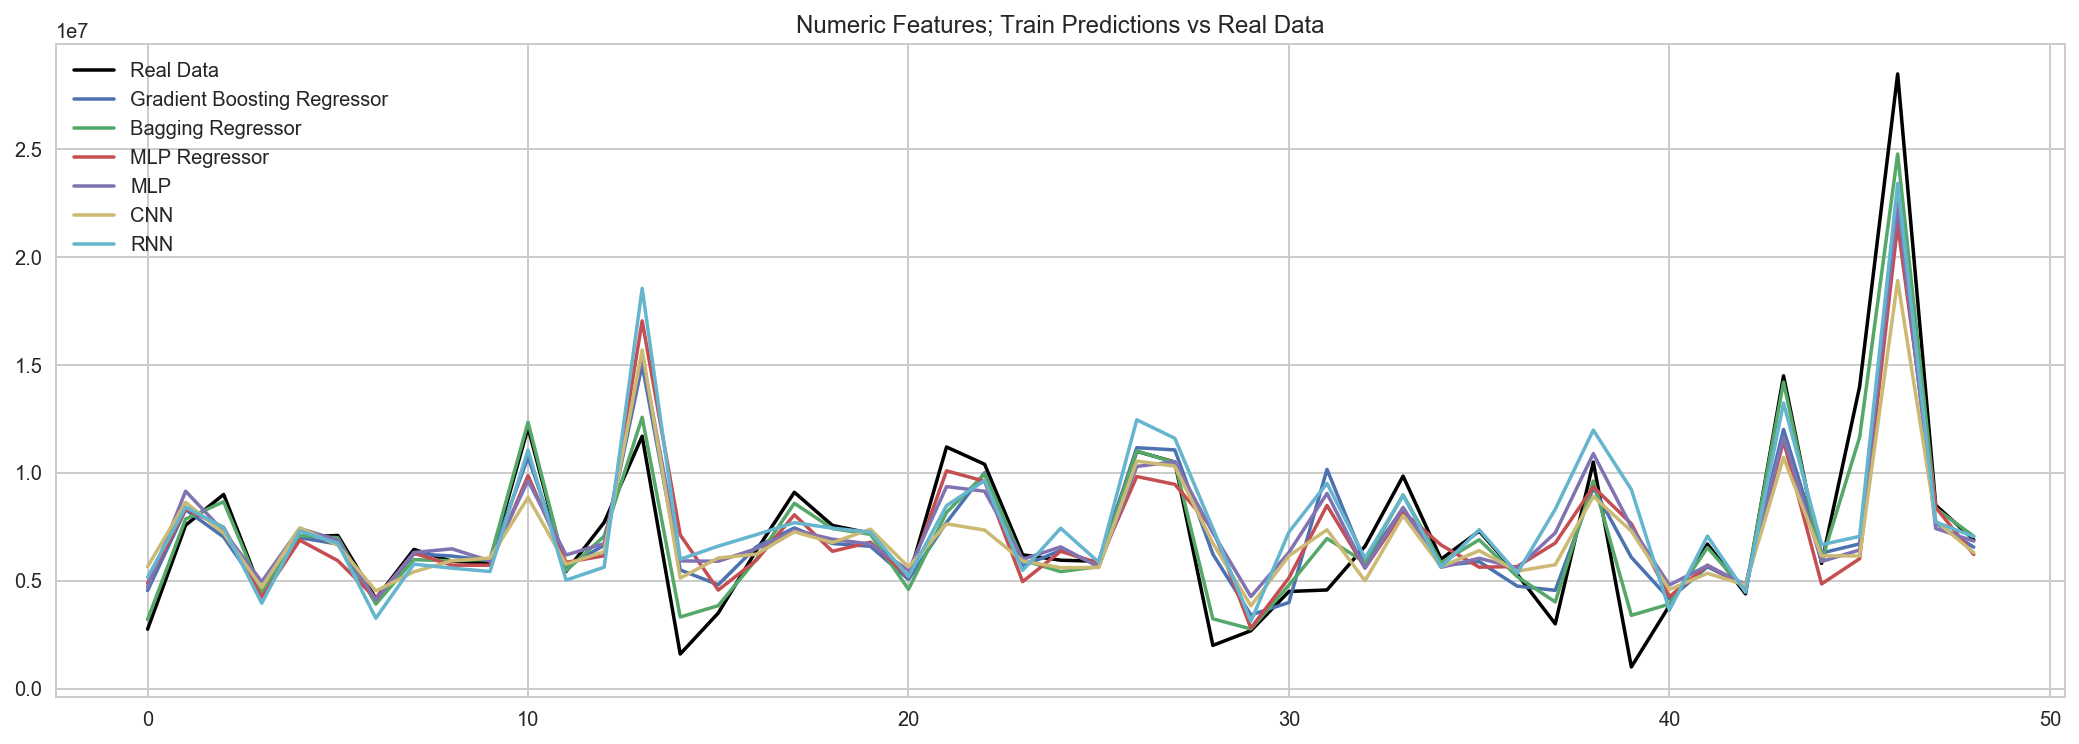

In [409]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_br[1:50], label='Bagging Regressor')
plt.plot(target_train_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_mlp[1:50], label='MLP')
plt.plot(target_train_cnn[1:50], label='CNN')
plt.plot(target_train_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Train Predictions vs Real Data");

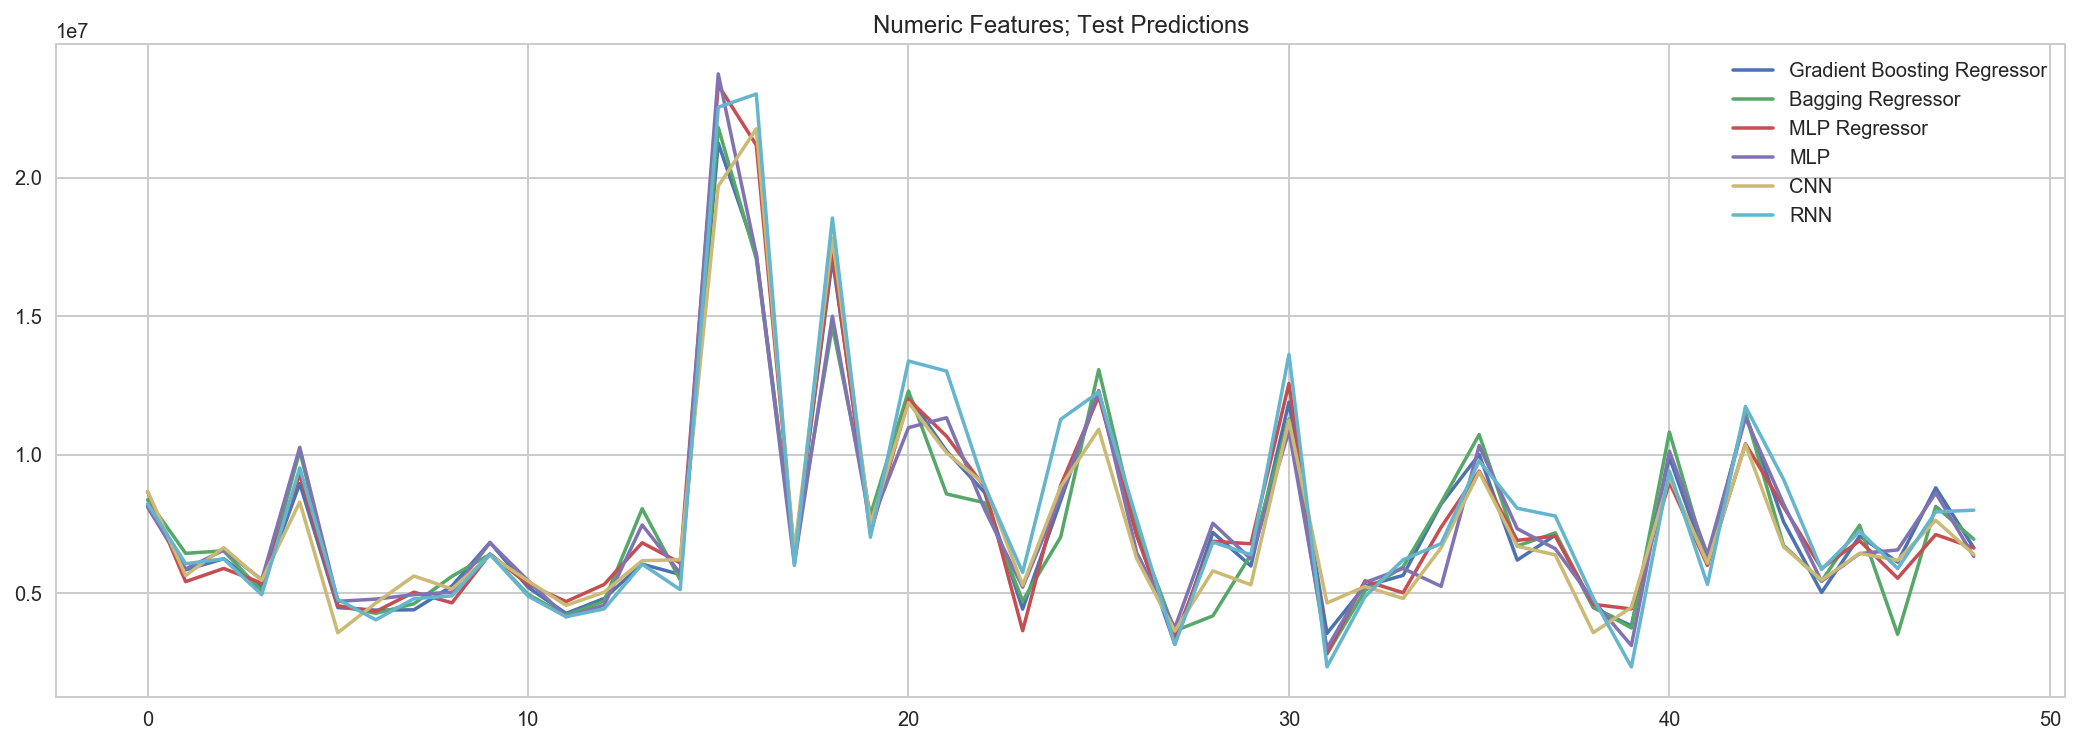

In [410]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_br[1:50], label='Bagging Regressor')
plt.plot(target_test_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_mlp[1:50], label='MLP')
plt.plot(target_test_cnn[1:50], label='CNN')
plt.plot(target_test_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Test Predictions");

In [411]:
hide_code
# Rescale Predictions
target_train_cat_gbr = target_scale.inverse_transform(s_target_train_cat_gbr.reshape(-1,1))
target_test_cat_gbr = target_scale.inverse_transform(s_target_test_cat_gbr.reshape(-1,1))
target_train_cat_br = target_scale.inverse_transform(s_target_train_cat_br.reshape(-1,1))
target_test_cat_br = target_scale.inverse_transform(s_target_test_cat_br.reshape(-1,1))
target_train_cat_mlpr = target_scale.inverse_transform(s_target_train_cat_mlpr.reshape(-1,1))
target_test_cat_mlpr = target_scale.inverse_transform(s_target_test_cat_mlpr.reshape(-1,1))

target_train_cat_mlp = target_scale.inverse_transform(s_target_train_cat_mlp.reshape(-1,1))
target_test_cat_mlp = target_scale.inverse_transform(s_target_test_cat_mlp.reshape(-1,1))
target_train_cat_cnn = target_scale.inverse_transform(s_target_train_cat_cnn.reshape(-1,1))
target_test_cat_cnn = target_scale.inverse_transform(s_target_test_cat_cnn.reshape(-1,1))
target_train_cat_rnn = target_scale.inverse_transform(s_target_train_cat_rnn.reshape(-1,1))
target_test_cat_rnn = target_scale.inverse_transform(s_target_test_cat_rnn.reshape(-1,1))

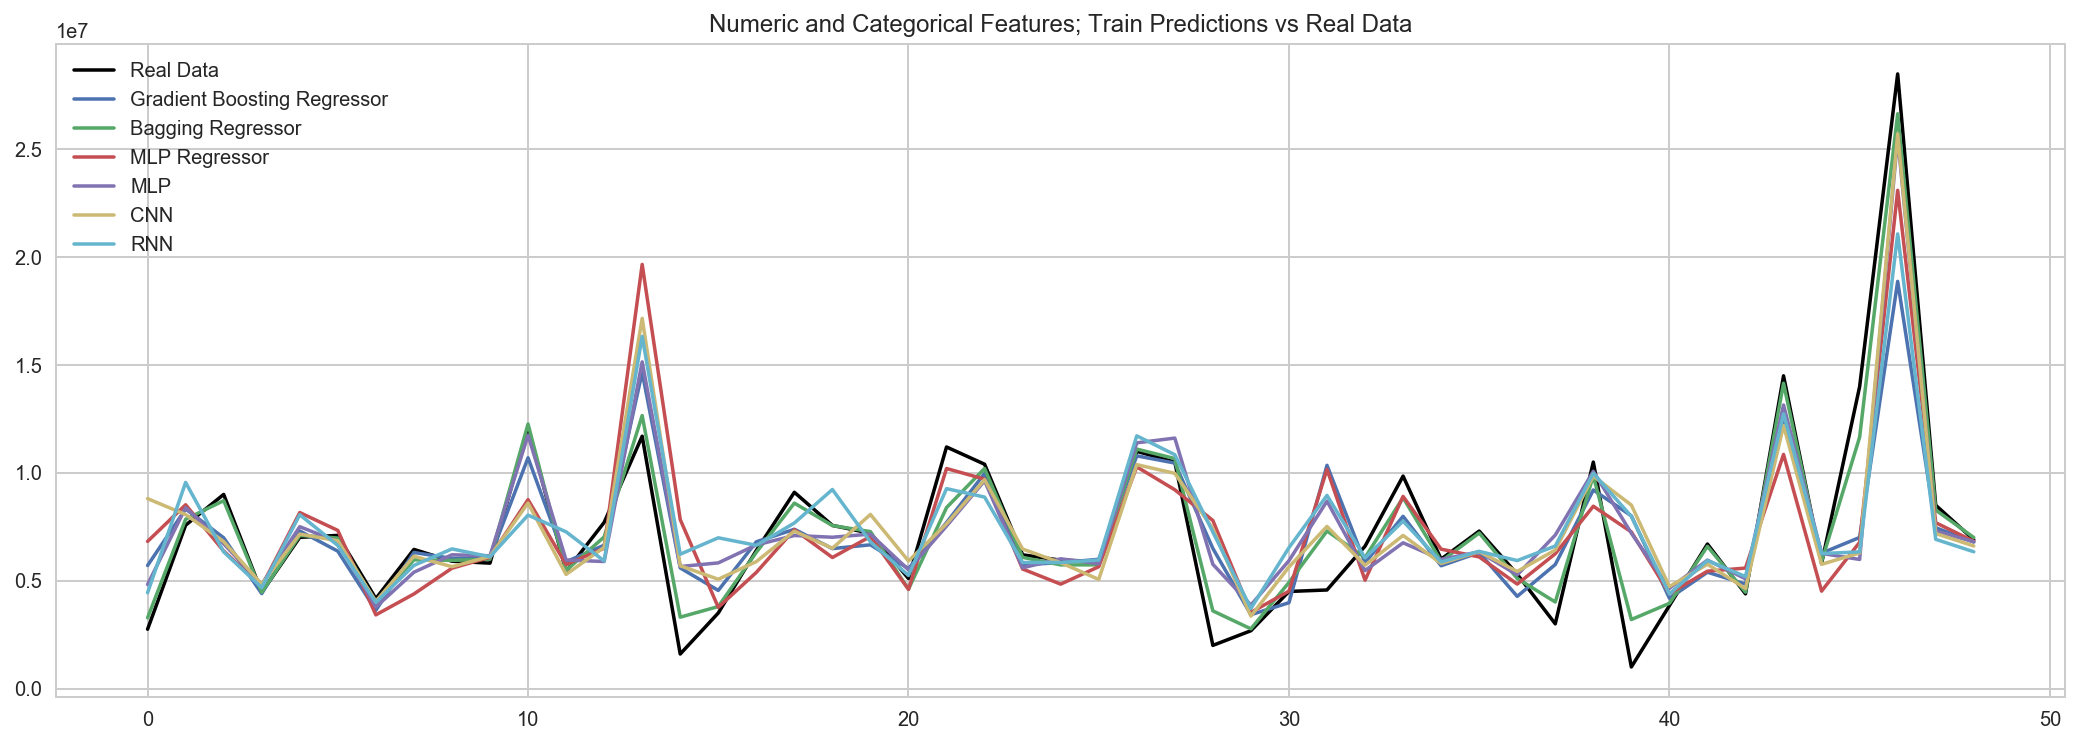

In [412]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_cat_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_cat_br[1:50], label='Bagging Regressor')
plt.plot(target_train_cat_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_cat_mlp[1:50], label='MLP')
plt.plot(target_train_cat_cnn[1:50], label='CNN')
plt.plot(target_train_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Train Predictions vs Real Data");

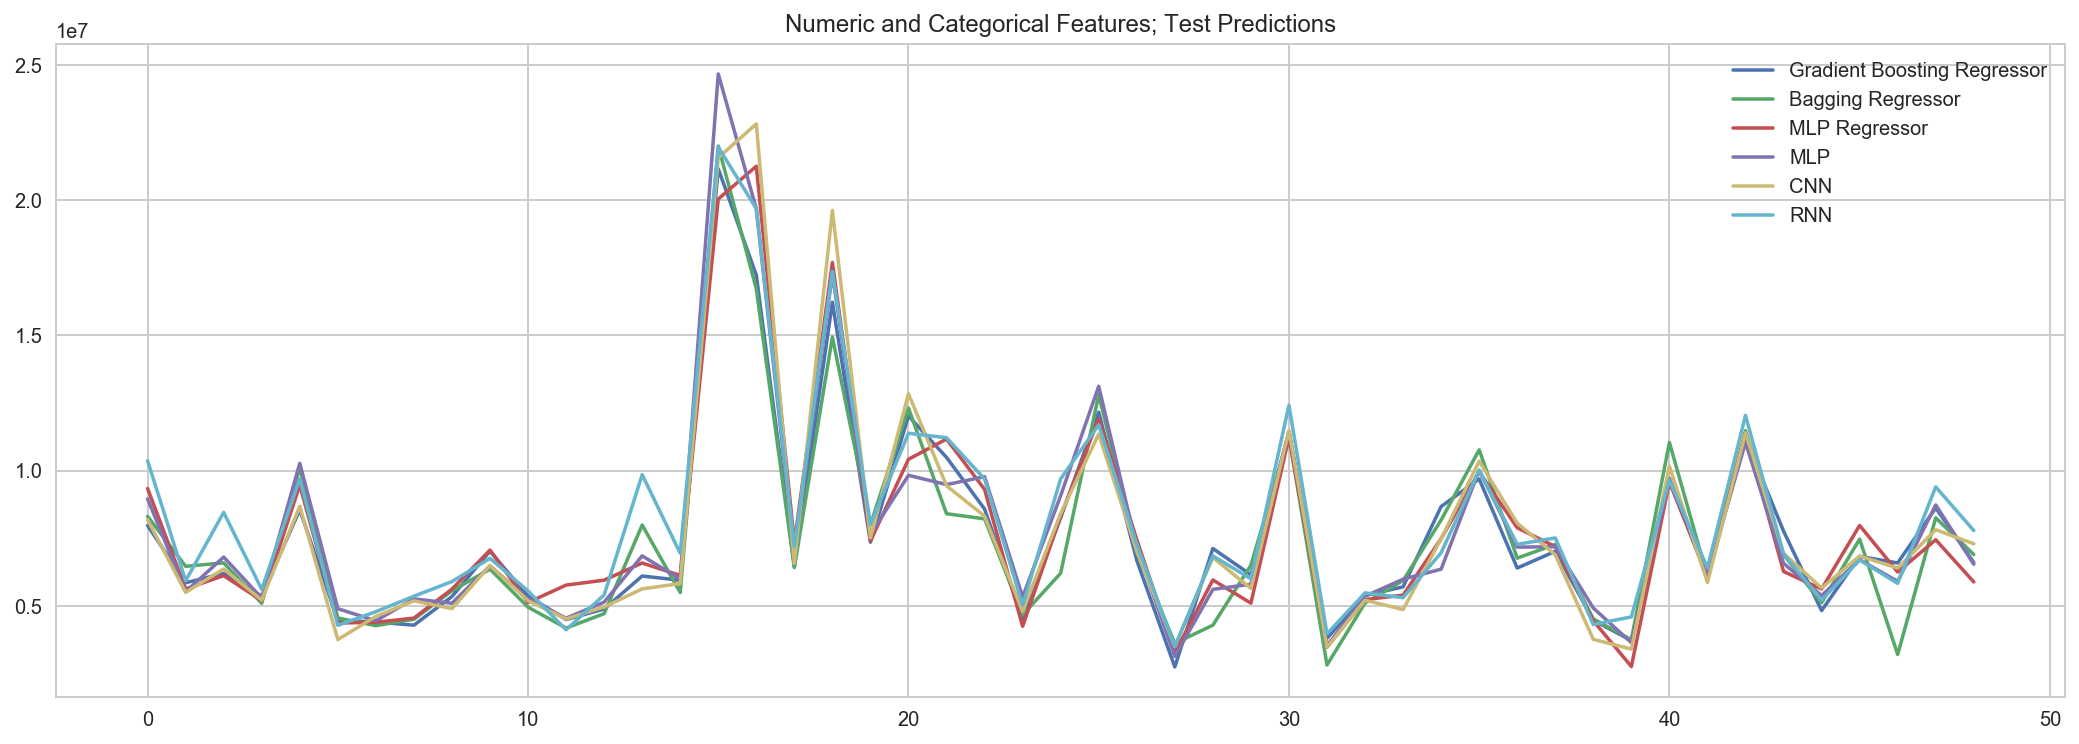

In [413]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_cat_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(target_test_cat_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_cat_mlp[1:50], label='MLP')
plt.plot(target_test_cat_cnn[1:50], label='CNN')
plt.plot(target_test_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Test Predictions");

In [414]:
hide_code
# Rescale Predictions
target_train_cat_enc_gbr = target_scale.inverse_transform(s_target_train_cat_enc_gbr.reshape(-1,1))
target_test_cat_enc_gbr = target_scale.inverse_transform(s_target_test_cat_enc_gbr.reshape(-1,1))
target_train_cat_enc_br = target_scale.inverse_transform(s_target_train_cat_enc_br.reshape(-1,1))
target_test_cat_enc_br = target_scale.inverse_transform(s_target_test_cat_enc_br.reshape(-1,1))
target_train_cat_enc_mlpr = target_scale.inverse_transform(s_target_train_cat_enc_mlpr.reshape(-1,1))
target_test_cat_enc_mlpr = target_scale.inverse_transform(s_target_test_cat_enc_mlpr.reshape(-1,1))

target_train_cat_enc_mlp = target_scale.inverse_transform(s_target_train_cat_enc_mlp.reshape(-1,1))
target_test_cat_enc_mlp = target_scale.inverse_transform(s_target_test_cat_enc_mlp.reshape(-1,1))
target_train_cat_enc_cnn = target_scale.inverse_transform(s_target_train_cat_enc_cnn.reshape(-1,1))
target_test_cat_enc_cnn = target_scale.inverse_transform(s_target_test_cat_enc_cnn.reshape(-1,1))
target_train_cat_enc_rnn = target_scale.inverse_transform(s_target_train_cat_enc_rnn.reshape(-1,1))
target_test_cat_enc_rnn = target_scale.inverse_transform(s_target_test_cat_enc_rnn.reshape(-1,1))

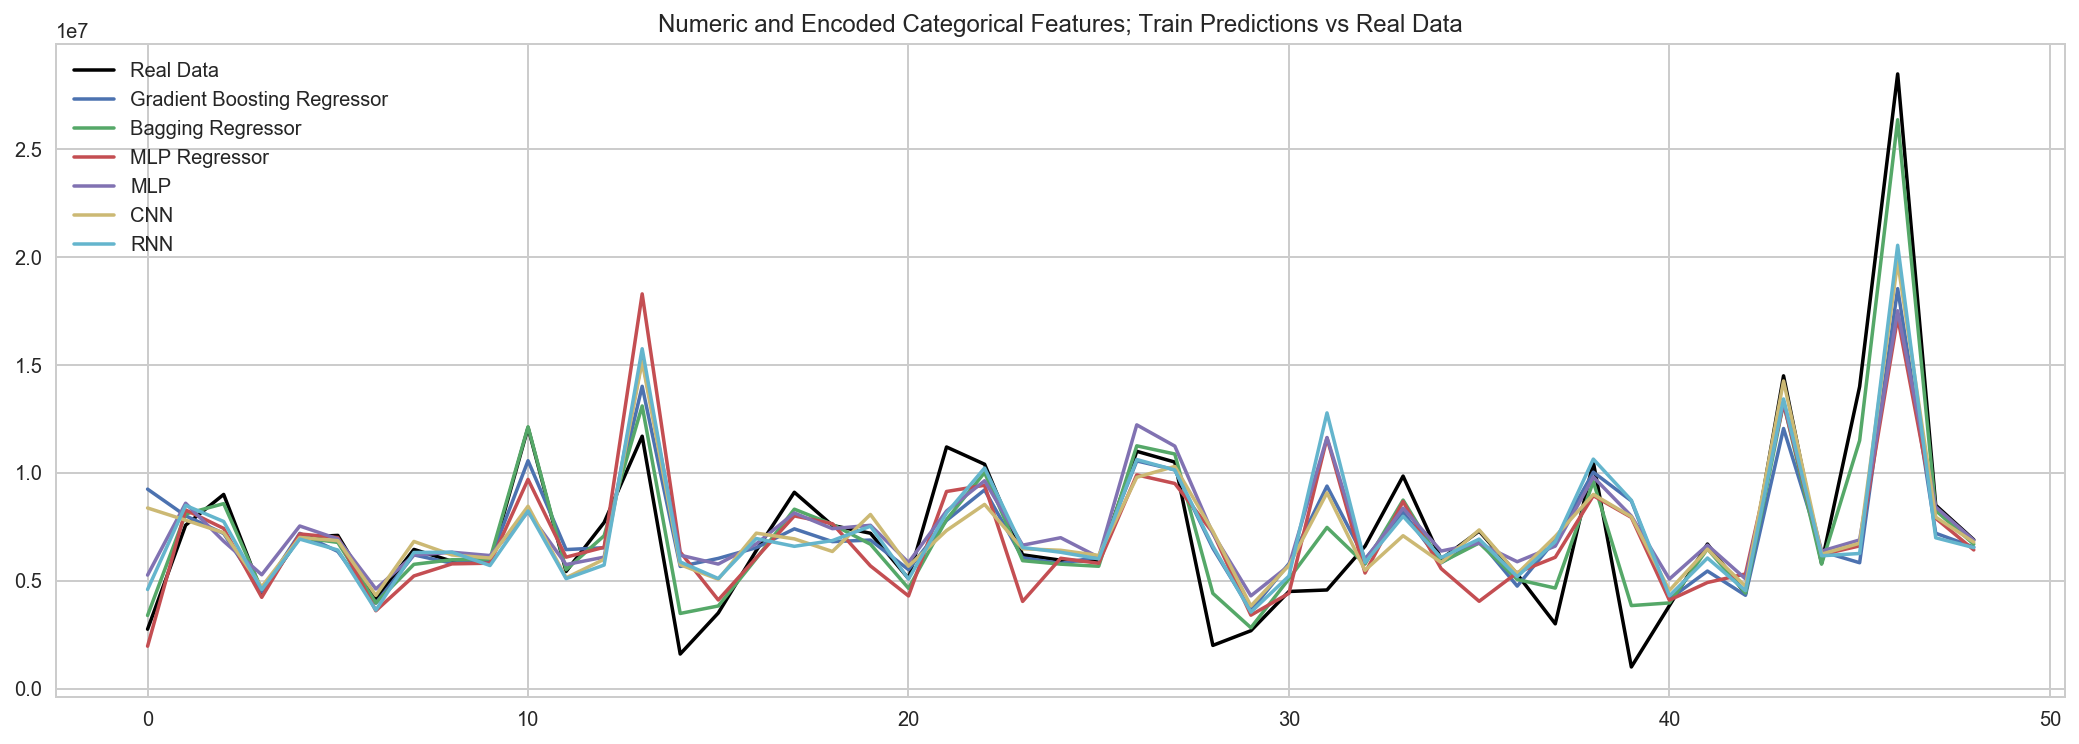

In [415]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_cat_enc_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(target_train_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_cat_enc_mlp[1:50], label='MLP')
plt.plot(target_train_cat_enc_cnn[1:50], label='CNN')
plt.plot(target_train_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Train Predictions vs Real Data");

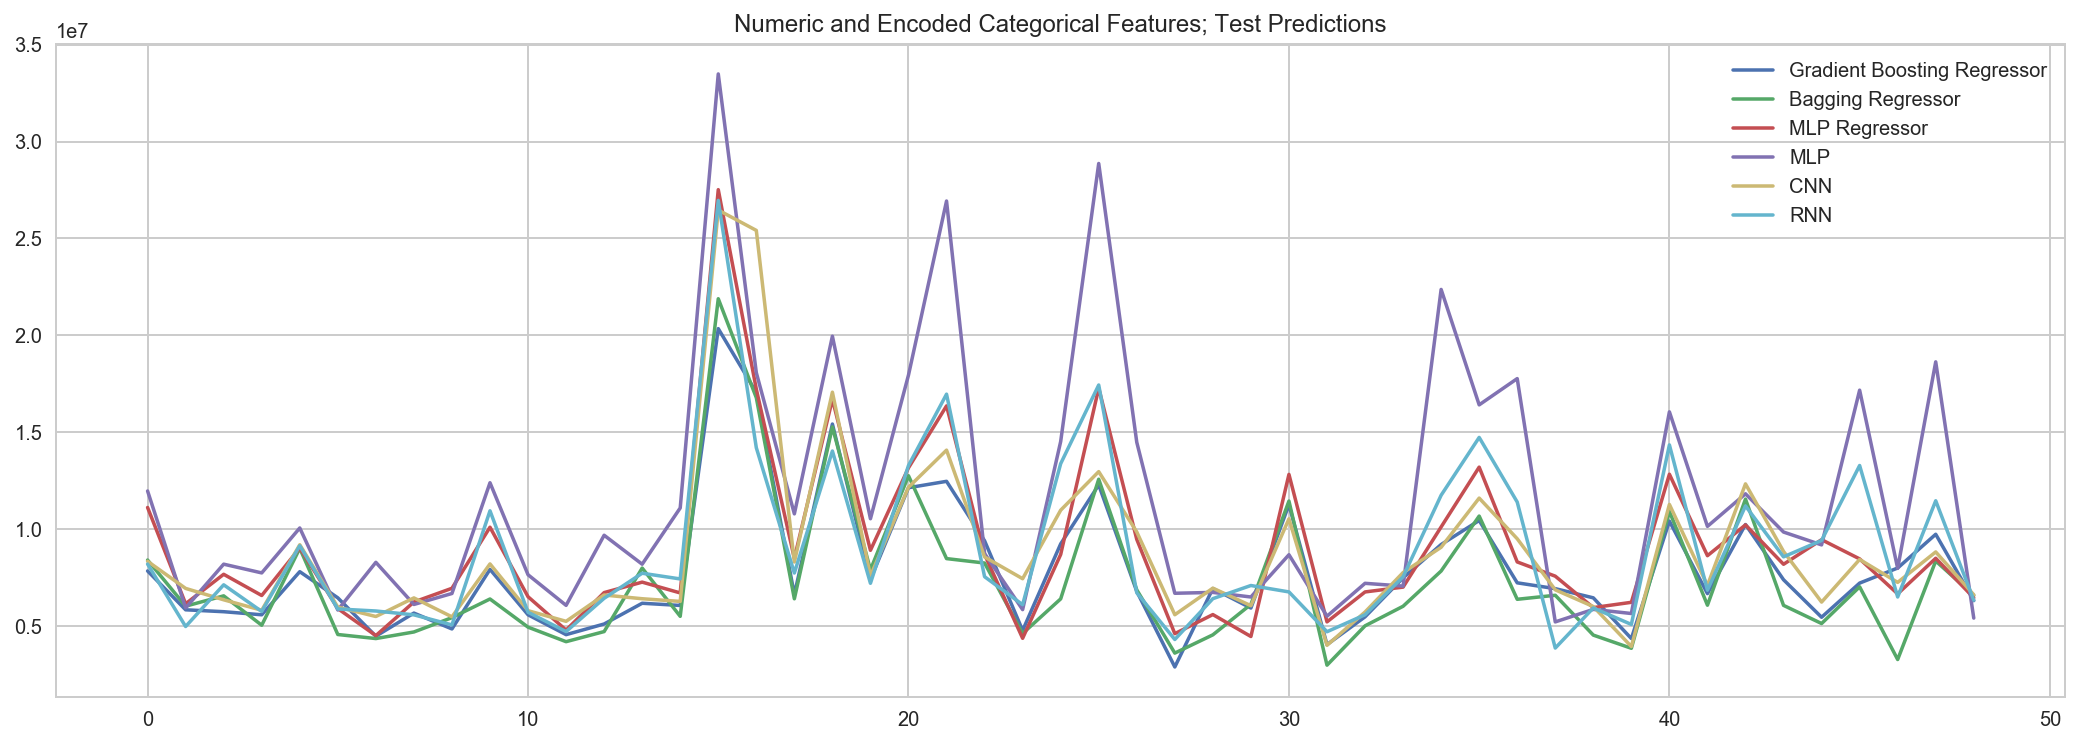

In [416]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_cat_enc_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(target_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(target_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(target_test_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Test Predictions");

---
## $\mathfrak {\color{#228B22} {8. \  Project \ Design }}$

The project was built on the basis of the competition offered on the site https://www.kaggle.com. 

The competition version of this notebook is avalible here: https://www.kaggle.com/olgabelitskaya/sberbank-russian-housing-market .

There are several popular resources (numpy, pandas, matplotlib, scikit-learn and keras) for regression models were used.

The most valuable in this project is the study of real data and the attempt to approximate the predictions on them to the threshold of 70-80 percent.